In [1]:
# Antes de correr este archivo, renombrar los videos usando "Rename czi files.ipynb"

# Importo librerías necesarias
from ipynb.fs.defs.aux_functions import *

from ipywidgets import interact, interact_manual, interactive, fixed
from IPython.display import display
import pandas as pd

from os.path import exists
from PIL import Image

c:\Users\PC\anaconda3\envs\PKLS\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\PC\anaconda3\envs\PKLS\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\PC\anaconda3\envs\PKLS\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\PC\anaconda3\envs\PKLS\lib\site-packages\tensorflow\python\framework\dtypes.

In [ ]:
# import sys
# import importlib
# importlib.reload(sys.modules['ipynb.fs.defs.aux_functions'])
# from ipynb.fs.defs.aux_functions import *
# !pip install aicspylibczi

In [2]:
# Guardo los directorios que voy a usar (cambiar si estoy en otra compu o si cambio de lugar algo)

drive_dir = r"H:\My Drive\Valen Agulló\Habenula\Experimentos Violeta 2024"
#disk_dir = "D:/Nico/VIDEOS MICROSCOPIO/Microscopio confocal/"
disk_dir = r"D:\Videos Confocal Valen"

#drive_dir = "L:/My Drive/Multimodal Integration/"
#disk_dir = "F:/Users/Nicolas/Desktop/REGISTROS CONFOCAL/"

data_dir = drive_dir 
areas_dir = r'C:\Users\PC\Desktop\Templados Violeta'
video_dir = disk_dir 

res_dir = r'C:\Users\PC\Desktop\Analisis conf\PKL 03-2025'

fish_interval = (0, 155)

In [3]:
areas = load_areas(res_dir)

for key in areas:
    print(areas[key].trials)
    print(key + ":", len(areas[key].trials), "trials.")

[<ipynb.fs.defs.aux_functions.Trial object at 0x000002090B5F4948>, <ipynb.fs.defs.aux_functions.Trial object at 0x000002090B6030C8>, <ipynb.fs.defs.aux_functions.Trial object at 0x000002090B6035C8>, <ipynb.fs.defs.aux_functions.Trial object at 0x000002090B603AC8>, <ipynb.fs.defs.aux_functions.Trial object at 0x000002090B603FC8>, <ipynb.fs.defs.aux_functions.Trial object at 0x000002090B607508>, <ipynb.fs.defs.aux_functions.Trial object at 0x000002090B607A08>, <ipynb.fs.defs.aux_functions.Trial object at 0x000002090B607F08>, <ipynb.fs.defs.aux_functions.Trial object at 0x000002090B60E448>, <ipynb.fs.defs.aux_functions.Trial object at 0x000002090B60E948>, <ipynb.fs.defs.aux_functions.Trial object at 0x0000020902C5AFC8>, <ipynb.fs.defs.aux_functions.Trial object at 0x0000020903126948>, <ipynb.fs.defs.aux_functions.Trial object at 0x000002090B60EDC8>, <ipynb.fs.defs.aux_functions.Trial object at 0x000002090B615308>, <ipynb.fs.defs.aux_functions.Trial object at 0x000002090B615808>, <ipynb.fs

In [14]:
areas

{'101-1': <ipynb.fs.defs.aux_functions.Area at 0x279f6f289c8>,
 '103-1': <ipynb.fs.defs.aux_functions.Area at 0x279f7140c88>,
 '104-1': <ipynb.fs.defs.aux_functions.Area at 0x279eedf0c08>,
 '105-1': <ipynb.fs.defs.aux_functions.Area at 0x279f6e400c8>,
 '107-1': <ipynb.fs.defs.aux_functions.Area at 0x279f6e41888>,
 '109-1': <ipynb.fs.defs.aux_functions.Area at 0x279f5e32308>,
 '110-1': <ipynb.fs.defs.aux_functions.Area at 0x279f5e183c8>,
 '111-1': <ipynb.fs.defs.aux_functions.Area at 0x279f5e18308>,
 '112-1': <ipynb.fs.defs.aux_functions.Area at 0x279f5e18488>,
 '71-1': <ipynb.fs.defs.aux_functions.Area at 0x279f5de24c8>,
 '73-1': <ipynb.fs.defs.aux_functions.Area at 0x279f5db5608>,
 '74-1': <ipynb.fs.defs.aux_functions.Area at 0x279f6ef6cc8>,
 '75-1': <ipynb.fs.defs.aux_functions.Area at 0x279f4d43148>,
 '76-1': <ipynb.fs.defs.aux_functions.Area at 0x279f4d43bc8>,
 '78-1': <ipynb.fs.defs.aux_functions.Area at 0x279f4d261c8>,
 '82-1': <ipynb.fs.defs.aux_functions.Area at 0x279e423b408>,

In [4]:
main_dir = r'D:\Videos Confocal Valen'
second_dir_list=[]
os.chdir(main_dir)
full_list = []
for carpetas in os.listdir():
    if '2025-' in carpetas:
        second_dir_list.append(main_dir+f'\{carpetas}')

        
for second_dir in second_dir_list: 
    thirt_dir_list = []
    temp_list = []
    os.chdir(second_dir)

    for a in os.listdir(): 
        if '_AVsS1' in a: 
            thirt_dir_list.append(second_dir+f'\{a}')
        if 'templados' in a.lower(): 
            temp_list.append(second_dir+f'\{a}')

    fourth_dir_list=[]
    
    for ult_carpeta in thirt_dir_list:
        os.chdir(ult_carpeta)

        for a in os.listdir():
            if 'AcquisitionBlock' in a: 
                fourth_dir_list.append(ult_carpeta+f'\{a}')

    full_list.append(fourth_dir_list)

In [5]:
full_list = [item for sublist in full_list for item in sublist]

In [6]:
full_list

['D:\\Videos Confocal Valen\\2025-03-10\\67_NeuroD_AVsS1-01.czi\\67_NeuroD_AVsS1-01_AcquisitionBlock2.czi',
 'D:\\Videos Confocal Valen\\2025-03-10\\68_NeuroD_AVsS1-01.czi\\68_NeuroD_AVsS1-01_AcquisitionBlock2.czi',
 'D:\\Videos Confocal Valen\\2025-03-10\\69_NeuroD_AVsS1-01.czi\\69_NeuroD_AVsS1-01_AcquisitionBlock2.czi',
 'D:\\Videos Confocal Valen\\2025-03-10\\70_NeuroD_AVsS1-01.czi\\70_NeuroD_AVsS1-01_AcquisitionBlock2.czi',
 'D:\\Videos Confocal Valen\\2025-03-10\\71_NeuroD_AVsS1-01.czi\\71_NeuroD_AVsS1-01_AcquisitionBlock2.czi',
 'D:\\Videos Confocal Valen\\2025-03-10\\72_NeuroD_AVsS1-01.czi\\72_NeuroD_AVsS1-01_AcquisitionBlock2.czi',
 'D:\\Videos Confocal Valen\\2025-03-10\\73_NeuroD_AVsS1-01.czi\\73_NeuroD_AVsS1-01_AcquisitionBlock2.czi',
 'D:\\Videos Confocal Valen\\2025-03-10\\74_NeuroD_AVsS1-01.czi\\74_NeuroD_AVsS1-01_AcquisitionBlock2.czi',
 'D:\\Videos Confocal Valen\\2025-03-10\\75_NeuroD_AVsS1-01.czi\\75_NeuroD_AVsS1-01_AcquisitionBlock2.czi',
 'D:\\Videos Confocal Valen\

In [7]:
result_dict = {}

# Procesar cada string
for string in full_list:
    # Extraer el número principal (por ejemplo, "46" de "46_NeuroD")
    base_number = string.split('\\')[-1].split('_')[0]  # Obtiene "46"

    # Generar claves 46-0, 46-1, 46-2 para cada string
    for i in range(3):  # Ajustar el rango según la cantidad deseada
        key = f"{base_number}-{i}"
        result_dict[key] = string

# Mostrar el diccionario
for key, value in result_dict.items():
    print(f"{key}: {value}")

67-0: D:\Videos Confocal Valen\2025-03-10\67_NeuroD_AVsS1-01.czi\67_NeuroD_AVsS1-01_AcquisitionBlock2.czi
67-1: D:\Videos Confocal Valen\2025-03-10\67_NeuroD_AVsS1-01.czi\67_NeuroD_AVsS1-01_AcquisitionBlock2.czi
67-2: D:\Videos Confocal Valen\2025-03-10\67_NeuroD_AVsS1-01.czi\67_NeuroD_AVsS1-01_AcquisitionBlock2.czi
68-0: D:\Videos Confocal Valen\2025-03-10\68_NeuroD_AVsS1-01.czi\68_NeuroD_AVsS1-01_AcquisitionBlock2.czi
68-1: D:\Videos Confocal Valen\2025-03-10\68_NeuroD_AVsS1-01.czi\68_NeuroD_AVsS1-01_AcquisitionBlock2.czi
68-2: D:\Videos Confocal Valen\2025-03-10\68_NeuroD_AVsS1-01.czi\68_NeuroD_AVsS1-01_AcquisitionBlock2.czi
69-0: D:\Videos Confocal Valen\2025-03-10\69_NeuroD_AVsS1-01.czi\69_NeuroD_AVsS1-01_AcquisitionBlock2.czi
69-1: D:\Videos Confocal Valen\2025-03-10\69_NeuroD_AVsS1-01.czi\69_NeuroD_AVsS1-01_AcquisitionBlock2.czi
69-2: D:\Videos Confocal Valen\2025-03-10\69_NeuroD_AVsS1-01.czi\69_NeuroD_AVsS1-01_AcquisitionBlock2.czi
70-0: D:\Videos Confocal Valen\2025-03-10\70_N

In [8]:
result_dict


{'67-0': 'D:\\Videos Confocal Valen\\2025-03-10\\67_NeuroD_AVsS1-01.czi\\67_NeuroD_AVsS1-01_AcquisitionBlock2.czi',
 '67-1': 'D:\\Videos Confocal Valen\\2025-03-10\\67_NeuroD_AVsS1-01.czi\\67_NeuroD_AVsS1-01_AcquisitionBlock2.czi',
 '67-2': 'D:\\Videos Confocal Valen\\2025-03-10\\67_NeuroD_AVsS1-01.czi\\67_NeuroD_AVsS1-01_AcquisitionBlock2.czi',
 '68-0': 'D:\\Videos Confocal Valen\\2025-03-10\\68_NeuroD_AVsS1-01.czi\\68_NeuroD_AVsS1-01_AcquisitionBlock2.czi',
 '68-1': 'D:\\Videos Confocal Valen\\2025-03-10\\68_NeuroD_AVsS1-01.czi\\68_NeuroD_AVsS1-01_AcquisitionBlock2.czi',
 '68-2': 'D:\\Videos Confocal Valen\\2025-03-10\\68_NeuroD_AVsS1-01.czi\\68_NeuroD_AVsS1-01_AcquisitionBlock2.czi',
 '69-0': 'D:\\Videos Confocal Valen\\2025-03-10\\69_NeuroD_AVsS1-01.czi\\69_NeuroD_AVsS1-01_AcquisitionBlock2.czi',
 '69-1': 'D:\\Videos Confocal Valen\\2025-03-10\\69_NeuroD_AVsS1-01.czi\\69_NeuroD_AVsS1-01_AcquisitionBlock2.czi',
 '69-2': 'D:\\Videos Confocal Valen\\2025-03-10\\69_NeuroD_AVsS1-01.czi\

In [7]:
ULR_carpetas_test = { '1-1':r'D:\Videos Confocal Valen\100624\2024-06-10\1_NeuroD_plano1-01.czi\1_NeuroD_plano1-01_AcquisitionBlock2.czi',
                     '2-1': r'D:\Videos Confocal Valen\100624\2024-06-10\2_HuC_plano1-01.czi\2_HuC_plano1-01_AcquisitionBlock2.czi',
                     '4-1':r'D:\Videos Confocal Valen\250624\2024-06-25\4-1-01.czi\4-1-01_AcquisitionBlock2.czi',
                     '5-1':r'D:\Videos Confocal Valen\250624\2024-06-25\5-1-01.czi\5-1-01_AcquisitionBlock2.czi',
                     '6-1':r'D:\Videos Confocal Valen\250624\2024-06-25\6-1-01.czi\6-1-01_AcquisitionBlock2.czi',
                     '7-1':r'D:\Videos Confocal Valen\270624\2024-06-27\7-1-01.czi\7-1-01_AcquisitionBlock2.czi',
                     '8-1':r'D:\Videos Confocal Valen\270624\2024-06-27\8-1-01.czi\8-1-03_AcquisitionBlock2.czi',
                     '10-1':r'D:\Videos Confocal Valen\270624\2024-06-27\10-1-01.czi\10-1-01_AcquisitionBlock2.czi',
                     '11-1':r'D:\Videos Confocal Valen\280624\2024-06-28\11-1-02.czi\11-1-02_AcquisitionBlock2.czi',
                     '12-1':r'D:\Videos Confocal Valen\280624\2024-06-28\12-1-01.czi\12-1-01_AcquisitionBlock2.czi',
                     '13-1':r'D:\Videos Confocal Valen\280624\2024-06-28\13-1-01.czi\13-1-01_AcquisitionBlock2.czi',
                     '14-1':r'D:\Videos Confocal Valen\280624\2024-06-28\14-1-01.czi\14-1-01_AcquisitionBlock2.czi',
                     '15-1':r'D:\Videos Confocal Valen\290624\2024-06-29\15-1-01.czi\15-1-01_AcquisitionBlock2.czi',
                     '17-1':r'D:\Videos Confocal Valen\290624\2024-06-29\17-1-01.czi\17-1-01_AcquisitionBlock2.czi',
                     '18-1':r'D:\Videos Confocal Valen\110724\2024-07-11\18-1-01.czi\18-1-01_AcquisitionBlock2.czi',
                     '19-1':r'D:\Videos Confocal Valen\110724\2024-07-11\19-1-01.czi\19-1-01_AcquisitionBlock2.czi',
                     '20-1':r'D:\Videos Confocal Valen\110724\2024-07-11\20-1-01.czi\20-1-01_AcquisitionBlock2.czi',
                     '21-1':r'D:\Videos Confocal Valen\120724\2024-07-12\21-1-02.czi\21-1-02_AcquisitionBlock2.czi',
                     '22-1':r'D:\Videos Confocal Valen\120724\2024-07-12\22-1-01.czi\22-1-01_AcquisitionBlock2.czi',
                     '23-1':r'D:\Videos Confocal Valen\120724\2024-07-12\23-1-02.czi\23-1-02_AcquisitionBlock2.czi',
                    #  '25-1':r'D:\Videos Confocal Valen\130724\2024-07-13\25-1-01.czi\25-1-01_AcquisitionBlock2.czi',
                     '26-1':r'D:\Videos Confocal Valen\150724\2024-07-15\26-1-02.czi\26-1-02_AcquisitionBlock2.czi',
                     '27-1':r'D:\Videos Confocal Valen\150724\2024-07-15\27-1-01.czi\27-1-01_AcquisitionBlock2.czi',                     
                     }
                      
                    #  ,
                    #  r'D:\Videos Confocal Valen\250624\2024-06-25\5-1-01.czi\5-1-01_AcquisitionBlock2.czi',
                    #  r'D:\Videos Confocal Valen\270624\2024-06-27\8-1-01.czi\8-1-03_AcquisitionBlock2.czi',
                    #  r'D:\Videos Confocal Valen\280624\2024-06-28\12-1-01.czi\12-1-01_AcquisitionBlock2.czi',
                    #  r'D:\Videos Confocal Valen\290624\2024-06-29\15-1-01.czi\15-1-01_AcquisitionBlock2.czi',
                    #  r'D:\Videos Confocal Valen\110724\2024-07-11\19-1-01.czi\19-1-01_AcquisitionBlock2.czi'}

In [9]:
def buscar_archivo(nombre_archivo, ruta_base):
    # Recorremos todas las carpetas y archivos dentro de la ruta base
    for root, dirs, files in os.walk(ruta_base):
        # Si el archivo está en la lista de archivos en esta carpeta
        if nombre_archivo in files:
            # Retornamos la ruta completa al archivo
            return os.path.join(root, nombre_archivo)
    
    # Si no se encuentra, retornamos un mensaje indicando que no existe
    return f'Archivo {nombre_archivo} no encontrado en {ruta_base}'

# Definir el nombre del archivo y la ruta base

ruta_base = 'D:\\Videos Confocal Valen'

In [33]:
for j, key in enumerate(areas):
    if key not in ULR_carpetas_test.keys():
        dia = areas['4-1'].fecha[-2:]
        mes = areas['1-1'].fecha[-5:-3]
        año = areas['1-1'].fecha[2:4]
        print(key)

NameError: name 'ULR_carpetas_test' is not defined

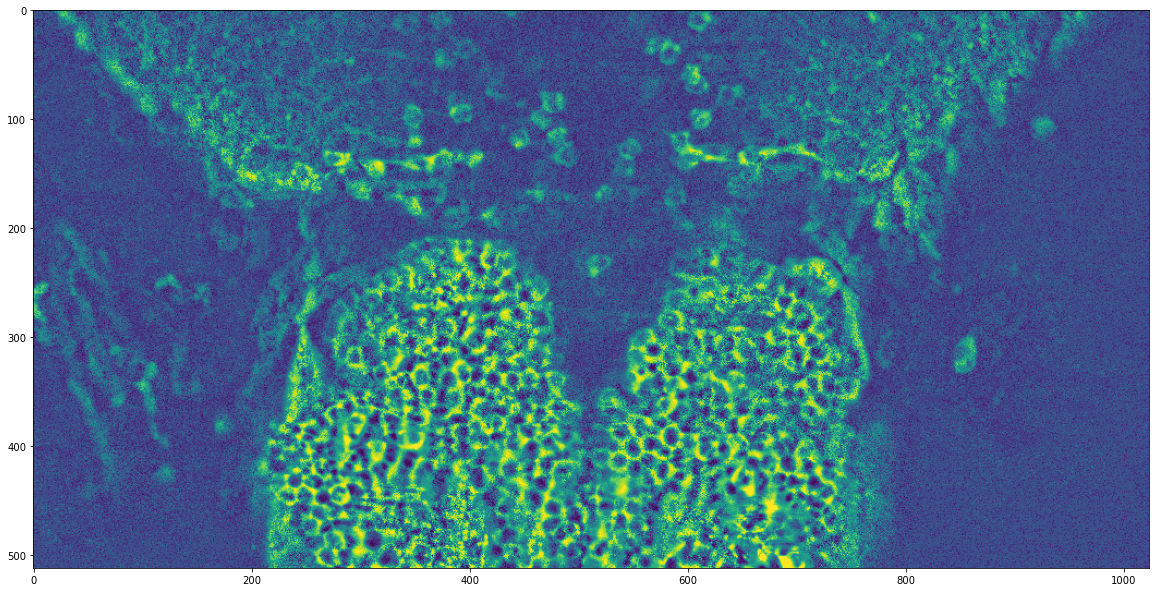

In [9]:
plt.figure(figsize=(20,20))
plt.imshow(areas['8-1'].template)


In [16]:
for key in areas:
    print(key[0] in ['7', '8'])

False
False
False
False
False
False
False
False
False
True
True
True
True
True
True
True
True
True
True
True
True
False
False
False
False
False
False
False
False


In [39]:
result_dict[key] +'\\'+ result_dict[key].split('\\')[-1][:-4]+'_Loop'+str(g+1)+'_mov_c_f_'+key[-1]+'.tiff'

'D:\\Videos Confocal Valen\\2024-11-15\\58_NeuroD_1Hz-01.czi\\58_NeuroD_1Hz-01_AcquisitionBlock2.czi\\58_NeuroD_1Hz-01_AcquisitionBlock2_Loop20_mov_c_f_2.tiff'

In [10]:
# Cargo el video de cada trial y lo incluyo en el objeto. Excluyo trials que no tienen video.
# areas = load_areas(res_dir)
# areas.pop('25-1')
for key in areas:
    if '52' not in key and key[0] in ['7', '8']:
        area = areas[key]
        trials = areas[key].trials
        
        for g,trial in enumerate(trials):
            # try:
            #     os.chdir(ULR_carpetas_test[j])
            # except:
            #     continue

            print(trial.trial)
            
            images = None
            
            # if exists(os.getcwd() + "/" + str(trial.trial) + ".czi"):
            #     images = load_czi(os.getcwd(), ULR_carpetas_test[j].split('\\')[-1][:-4]+'_Loop'+str(trial.trial)+'.czi', file_type = "video")
            # elif exists(os.getcwd() + "/" + str(trial.trial) + ".tif"):
            #     images = read_tiff(os.getcwd() + "/" + str(trial.trial) + ".tif")
            # images = read_tiff(os.getcwd() + "/" +ULR_carpetas_test[j].split('\\')[-1][:-4]+'_Loop'+str(g+1)+'_mov_c_f.tiff')
            # images = read_tiff(result_dict[key] +'\\'+ result_dict[key].split('\\')[-1][:-4]+'_Loop'+str(g+1)+'_mov_c_f_'+key[-1]+'.tiff')
            images = read_tiff(result_dict[key] +'\\'+ result_dict[key].split('\\')[-1][:-4]+'_Loop'+str(g+1)+'_mov_c_f_0.tiff')
            # images = load_czi(os.getcwd(), ULR_carpetas_test[j].split('\\')[-1][:-4]+'_Loop'+str(g+1)+'.czi', file_type = "video")
            if images is not None:
                print(images.shape)
                trial.set_video(images)
                trial.nframes= len(images)
            else:
                print("Could not load: ", trial.trial, trial.pez, trial.area)

                
        new_trials = []
        
        for trial in trials:
            if hasattr(trial, "video"):
                new_trials.append(trial)
        
        trials = new_trials
        
        
        median = []

        for t in trials:
            median.append(t.video.shape[1])

        median = np.median(median)
        
        stack = []
        new_trials = []

        for t in trials:
            if t.video.shape[1] == median: 
                print(t.video)
                stack.append(t.video)
                new_trials.append(t)

        area.trials = new_trials
        area.stack = np.concatenate(stack, axis = 0)
        
        print("Area", key, "|", len(area.trials), "trials | Stack:", area.stack.shape)

1361
(215, 128, 256)
1362
(215, 128, 256)
1363
(215, 128, 256)
1364
(215, 128, 256)
1365
(215, 128, 256)
1366
(215, 128, 256)
1367
(215, 128, 256)
1368
(215, 128, 256)
1369
(215, 128, 256)
1370
(215, 128, 256)
1371
(215, 128, 256)
1372
(215, 128, 256)
1373
(215, 128, 256)
1374
(215, 128, 256)
1375
(215, 128, 256)
1376
(215, 128, 256)
1377
(215, 128, 256)
1378
(215, 128, 256)
1379
(215, 128, 256)
1380
(215, 128, 256)
[[[46.682457  46.682457  55.614136  ...  3.9558487  6.4393845 10.001511 ]
  [31.240257  31.240257  36.078377  ...  5.974457   3.719574   2.0374908]
  [34.78765   34.78765   46.269882  ...  2.1836777  5.020256   2.8845062]
  ...
  [ 2.0824661  2.0824661  2.9752808 ...  3.1461868  3.910736   1.8080139]
  [ 2.9175339  2.9175339  2.0187454 ...  3.         3.         3.       ]
  [ 3.0059738  3.0059738  2.9235077 ...  2.0059738  1.9175339  1.0187454]]

 [[51.703903  51.703903  51.703903  ...  2.737389   3.9466357  2.1317558]
  [51.703903  51.703903  51.703903  ...  2.737389   3.

In [11]:

for key in areas:
    if '52' not in key and key[0] in ['7', '8']:
        area = areas[key]
        print(key)
        
        m_rig= area.stack

        
        area.m_rig = m_rig


71-1
73-1
74-1
75-1
76-1
78-1
82-1
83-1
84-1
85-1
86-1
87-1


In [68]:
# Aplico algoritmo de Motion Correction de CaImAn sobre cada stack de videos concatenados, uno por área.

# for key in areas:
#     area = areas[key]
#     print(key)
    
#     m_rig, m_template, m_shift, dview = motion_correct(area.stack, template = area.template_small, frate = 4, decay_time = 3.0)
#     movement = np.array(np.abs(m_shift)).sum(axis=1)
    
#     area.m_rig = m_rig
#     area.m_template = m_template
#     area.m_shifts = m_shift
#     area.movements = movement

#     print(movement.mean())
    
#     plt.plot(movement)
#     plt.show()

#     plt.imshow(m_template, cmap = "gray")
#     plt.show()
    
#     dview.terminate()

1-1


ValueError: Error: images must really be same size for register_translation

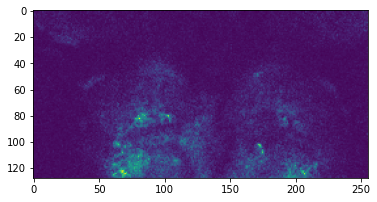

In [51]:
plt.imshow(area.stack[0])

In [20]:

def invert_array_positions(input_array):
    """
    Invierte las posiciones de los elementos en un array de coordenadas.
    """
    return [np.flip(arr, axis=1) for arr in input_array]

In [12]:
for key in areas:
    if '52' not in key and key[0] in ['7', '8']:
        area = areas[key]
        
        index = 0
        
        for t in area.trials:
            print(t.trial)

            v_len = t.nframes
            t.roi_activities = {}
            t.grid_activities = {}
            
            for subarea in area.contours_small:
                print(subarea)

                # t.roi_activities[subarea] = get_neuron_activities(area.stack[index:index+v_len], invert_array_positions(area.contours_small[subarea]))
                t.roi_activities[subarea] = get_neuron_activities(area.stack[index:index+v_len], area.contours_small[subarea])
                t.grid_activities[subarea] = get_grid_activities(area.stack[index:index+v_len], area.grids[subarea])

            index = index + v_len

1361
Hb
palium
1362
Hb
palium
1363
Hb
palium
1364
Hb
palium
1365
Hb
palium
1366
Hb
palium
1367
Hb
palium
1368
Hb
palium
1369
Hb
palium
1370
Hb
palium
1371
Hb
palium
1372
Hb
palium
1373
Hb
palium
1374
Hb
palium
1375
Hb
palium
1376
Hb
palium
1377
Hb
palium
1378
Hb
palium
1379
Hb
palium
1380
Hb
palium
1401
Hb
palium
1402
Hb
palium
1403
Hb
palium
1404
Hb
palium
1405
Hb
palium
1406
Hb
palium
1407
Hb
palium
1408
Hb
palium
1409
Hb
palium
1410
Hb
palium
1411
Hb
palium
1412
Hb
palium
1413
Hb
palium
1414
Hb
palium
1415
Hb
palium
1416
Hb
palium
1417
Hb
palium
1418
Hb
palium
1419
Hb
palium
1420
Hb
palium
1421
Hb
palium
1422
Hb
palium
1423
Hb
palium
1424
Hb
palium
1425
Hb
palium
1426
Hb
palium
1427
Hb
palium
1428
Hb
palium
1429
Hb
palium
1430
Hb
palium
1431
Hb
palium
1432
Hb
palium
1433
Hb
palium
1434
Hb
palium
1435
Hb
palium
1436
Hb
palium
1437
Hb
palium
1438
Hb
palium
1439
Hb
palium
1440
Hb
palium
1441
Hb
palium
1442
Hb
palium
1443
Hb
palium
1444
Hb
palium
1445
Hb
palium
1446
Hb
palium
1447
Hb
pa

In [22]:
areas

{'101-1': <ipynb.fs.defs.aux_functions.Area at 0x279f6f289c8>,
 '103-1': <ipynb.fs.defs.aux_functions.Area at 0x279f7140c88>,
 '104-1': <ipynb.fs.defs.aux_functions.Area at 0x279eedf0c08>,
 '105-1': <ipynb.fs.defs.aux_functions.Area at 0x279f6e400c8>,
 '107-1': <ipynb.fs.defs.aux_functions.Area at 0x279f6e41888>,
 '109-1': <ipynb.fs.defs.aux_functions.Area at 0x279f5e32308>,
 '110-1': <ipynb.fs.defs.aux_functions.Area at 0x279f5e183c8>,
 '111-1': <ipynb.fs.defs.aux_functions.Area at 0x279f5e18308>,
 '112-1': <ipynb.fs.defs.aux_functions.Area at 0x279f5e18488>,
 '71-1': <ipynb.fs.defs.aux_functions.Area at 0x279f5de24c8>,
 '73-1': <ipynb.fs.defs.aux_functions.Area at 0x279f5db5608>,
 '74-1': <ipynb.fs.defs.aux_functions.Area at 0x279f6ef6cc8>,
 '75-1': <ipynb.fs.defs.aux_functions.Area at 0x279f4d43148>,
 '76-1': <ipynb.fs.defs.aux_functions.Area at 0x279f4d43bc8>,
 '78-1': <ipynb.fs.defs.aux_functions.Area at 0x279f4d261c8>,
 '82-1': <ipynb.fs.defs.aux_functions.Area at 0x279e423b408>,

In [13]:
areas[key].__dict__.keys()


dict_keys(['pez', 'n', 'trials', 'template', 'polygons_per_area', 'subtemplates', 'fecha', 'x', 'y', 'z', 'regions', 'template_small', 'factor', 'polygons_per_area_small', 'midline_points', 'grids', 'contours', 'centers', 'contours_small', 'centers_small', 'grid_lefties', 'roi_lefties'])

In [15]:
np.mean(areas['75-1'].trials[0].video,axis=0)

array([[20.97325  , 20.641586 , 25.202864 , ...,  2.8713853,  2.8437562,
         2.8437562],
       [20.97325  , 20.641586 , 25.202864 , ...,  2.8713853,  2.8437562,
         2.8437562],
       [14.328822 , 12.860869 , 13.72964  , ...,  2.7498872,  2.821995 ,
         2.821995 ],
       ...,
       [ 2.9988332,  3.0284946,  3.0883596, ...,  3.0870194,  3.0004773,
         3.0004773],
       [ 2.9020371,  2.9657772,  3.096627 , ...,  2.9446726,  2.9764817,
         2.9764817],
       [ 2.805232 ,  2.9177697,  3.0906777, ...,  2.9142237,  2.9433296,
         2.9433296]], dtype=float32)

In [68]:
areas['53-1'].contours['palium'].shape

(94,)

(-0.5, 1023.5, 511.5, -0.5)

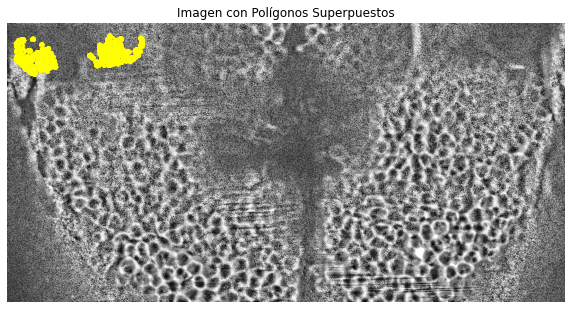

In [38]:

plt.figure(figsize=(10, 8))
key = '73-1'
plt.imshow(areas[key].template, cmap='gray')
# plt.imshow(np.mean(areas[key].trials[0].video,axis=0), cmap='gray')

# Supongamos que el array que contiene los contornos de los polígonos se llama `polygons`
# polygons = invert_array_positions(areas[key].contours['Hb'])
polygons = areas[key].contours_small['Hb']
# polygons = (areas[key].contours['Hb'])

# Dibujar cada polígono en la imagen
for polygon in polygons:
    x_coords = polygon[:, 0]
    y_coords = polygon[:, 1]
    plt.scatter(x_coords, y_coords,  linestyle='-', color='yellow', s=1)

# Mostrar la imagen con los polígonos superpuestos
plt.title('Imagen con Polígonos Superpuestos')
plt.axis('off')  # Opcional: oculta los ejes
# plt.show()
# plt.imshow((areas['30-2'].template_small))
# for n in  invert_array_positions(areas['30-2'].contours_small['Hb'])[:20]:
#     for j in n:
#         plt.scatter(j[1], j[0])

In [28]:
len(areas['30-2'].contours_small['Hb'][3])

88

In [13]:
# import numpy as np
from scipy.signal import savgol_filter, medfilt
from scipy.ndimage import percentile_filter
# import matplotlib.pyplot as plt
from pykalman import KalmanFilter
import pywt
# from statsmodels.robust import mad

def wavelet_denoise(data, wavelet='db2', level=3):
    # Decompose to get the wavelet coefficients
    coeff = pywt.wavedec(data, wavelet, mode="per")
    
    # Define threshold as a function of the noise variance
    sigma = mad(coeff[-level])
    uthresh = sigma * np.sqrt(2*np.log(len(data)))
    coeff[1:] = (pywt.threshold(i, value=uthresh, mode='hard') for i in coeff[1:])
    
    # Reconstruct the signal using the thresholded coefficients
    return pywt.waverec(coeff, wavelet, mode='per')

def kalman_denoise(data):
    # Initialize the Kalman filter
    kf = KalmanFilter(transition_matrices = [1],
                      observation_matrices = [1],
                      initial_state_mean = data[0],
                      initial_state_covariance = 1,
                      observation_covariance=0.1,
                      transition_covariance=0.1)
    
    # Use the Kalman filter to estimate the hidden state
    return kf.smooth(data)[0].flatten()

def past_percentile_filter(data, percentile, size):
    output = np.empty_like(data)
    for i in range(len(data)):
        if i < size:
            # For the initial elements, we still need to consider some "future" elements
            output[i] = np.percentile(data[:i+size+1], percentile)
        else:
            output[i] = np.percentile(data[i-size:i+1], percentile)
    return output

def to_dffs(activities, baseline_window=60, percentile=8):
    # Calculate a rolling baseline using a percentile filter
    baselines = np.empty_like(activities)
    for i in range(activities.shape[0]):
        #baselines[i, :] = percentile_filter(activities[i, :], percentile, size=baseline_window)
        baselines[i, :] = past_percentile_filter(activities[i, :], percentile, size=baseline_window)

    # Ensure the baseline is not zero to avoid division by zero
    baselines = np.where(baselines==0, np.finfo(float).eps, baselines)

    # Calculate dF/F
    dffs = (activities - baselines) / baselines

    return dffs, baselines

def to_binaries(dffs, smooth_window=5, polyorder=3, multiplier=3):
    # Smooth the dF/F signal using a Savitzky-Golay filter
    smooth_dffs = np.empty_like(dffs)
    
    for i in range(dffs.shape[0]):
    #    smooth_dffs[i, :] = savgol_filter(dffs[i, :], smooth_window, polyorder)
        smooth_dffs[i, :] = kalman_denoise(dffs[i, :])
    #    smooth_dffs[i, :] = wavelet_denoise(dffs[i, :])
        
    # Calculate the noise level using the median absolute deviation
    mad = np.median(np.abs(smooth_dffs - np.median(smooth_dffs, axis=1, keepdims=True)), axis=1, keepdims=True)

    # Threshold for event detection
    threshold = np.median(smooth_dffs, axis=1, keepdims=True) + multiplier * mad

    # A neuron is active if the dF/F signal exceeds the threshold
    binaries = smooth_dffs > threshold

    return binaries, smooth_dffs

In [ ]:
import dask.bag as db

# Adjust these values based on your system's resources
num_workers = 10 # Set the number of workers
client = Client(n_workers=num_workers)

def process_trial(trial):
    print("Processing trial number", trial.trial)

    trial.roi_dffs = {}
    trial.roi_baselines = {}
    trial.roi_binaries = {}
    trial.roi_smooth_dffs = {}
    
    for subarea in trial.roi_activities:
        activities = trial.roi_activities[subarea]

        if activities.shape[0] == 0:
            print("No neurons in this region... weird.", trial.trial, subarea)
            continue

        trial.roi_dffs[subarea], trial.roi_baselines[subarea] = to_dffs(activities, baseline_window=60)
        trial.roi_binaries[subarea], trial.roi_smooth_dffs[subarea] = to_binaries(trial.roi_dffs[subarea])

        print(subarea, "| Activities:", activities.shape, "| dF/Fs:", trial.roi_dffs[subarea].shape, "| Binaries:", trial.roi_binaries[subarea].shape)
    
    # trial.grid_dffs = {}
    # trial.grid_baselines = {}
    # trial.grid_binaries = {}
    # trial.grid_smooth_dffs = {}
    
    # for subarea in trial.grid_activities:
    #     activities = trial.grid_activities[subarea]

    #     if activities.shape[0] == 0:
    #         print("No neurons in this region... weird.", trial.trial, subarea)
    #         continue

    #     trial.grid_dffs[subarea], trial.grid_baselines[subarea] = to_dffs(activities)
    #     trial.grid_binaries[subarea], trial.grid_smooth_dffs[subarea] = to_binaries(trial.grid_dffs[subarea])

    #     print(subarea, "| Activities:", activities.shape, "| dF/Fs:", trial.grid_dffs[subarea].shape, "| Binaries:", trial.grid_binaries[subarea].shape)

    return trial

for key in areas:
    if '52' not in key and key[0] in ['7', '8']:
        print("Processing area number", key)
        
        trials_bag = db.from_sequence(areas[key].trials)
        trials = trials_bag.map(process_trial).compute()
        
        # Now, trials contain the processed trial objects and you can assign it back or use as needed.
        areas[key].trials = trials



Processing area number 71-1
Processing area number 73-1
Processing area number 74-1
Processing area number 75-1
Processing area number 76-1
Processing area number 78-1
Processing area number 82-1
Processing area number 83-1
Processing area number 84-1
Processing area number 85-1
Processing area number 86-1
Processing area number 87-1


In [15]:
def to_dffs(activities, acts_to_filter, time_scale_in_frames = 15, window = 10, fast = False):
    baseline = linearly_extended_filter(acts_to_filter, time_scale_in_frames, window = window, fast = fast)
    #baseline = gaussian_filter1d(activities, time_scale_in_frames, mode = 'nearest')
    
    dffs = (activities - baseline)#/baseline
    return dffs, baseline

dffs_scale_seconds = 4
dffs_window_seconds = 3

binaries_std_s = 1
binaries_window_seconds = 15

binaries_baseline = 15
binaries_th = 1.5

for key in areas:
    if '52' not in key and key[0] in ['7', '8']:
        print(key)
        for trial in areas[key].trials:
            if np.isnan(trial.total_time):
                frames_per_s = trial.nframes /37
            else:
                frames_per_s = trial.nframes / trial.total_time
            
            for subarea in trial.roi_binaries:
                
                new_acts = []
                
                for roi in range(trial.roi_binaries[subarea].shape[0]):
                    x = np.arange(len(trial.roi_binaries[subarea][roi]))[trial.roi_binaries[subarea][roi]==0]
                    y = trial.roi_activities[subarea][roi,trial.roi_binaries[subarea][roi]==0]
                    
                    nx = np.arange(trial.nframes)
                    ny = np.interp(nx,x,y)
                    
                    new_acts.append(ny)
                
                new_acts = np.vstack(new_acts)
                
                trial.roi_dffs[subarea], __ = to_dffs(trial.roi_activities[subarea], new_acts, time_scale_in_frames = frames_per_s * dffs_scale_seconds,
                                                                window = int(frames_per_s * dffs_window_seconds), fast = True)
                
            # for subarea in trial.grid_binaries:
                
            #     new_acts = []
                
            #     for grid in range(trial.grid_binaries[subarea].shape[0]):
            #         x = np.arange(len(trial.grid_binaries[subarea][grid]))[trial.grid_binaries[subarea][grid]==0]
            #         y = trial.grid_activities[subarea][grid,trial.grid_binaries[subarea][grid]==0]
                    
            #         nx = np.arange(trial.nframes)
            #         ny = np.interp(nx,x,y)
                    
            #         new_acts.append(ny)
                
            #     new_acts = np.vstack(new_acts)
                
            #     trial.grid_dffs[subarea], __ = to_dffs(trial.grid_activities[subarea], new_acts, time_scale_in_frames = frames_per_s * dffs_scale_seconds,
            #                                                     window = int(frames_per_s * dffs_window_seconds), fast = True)

71-1
73-1
74-1
75-1
76-1
78-1
82-1
83-1
84-1
85-1
86-1
87-1


In [16]:
trial.total_time

34.4000000000031

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [23]:
# def to_binaries(dffs, std = 3, window = 10, baseline = 25, th = 1.4, ret_params = False, fast = False):
#     #filtered = gaussian_filter1d(dffs, std)
#     filtered = linearly_extended_filter(dffs, std, window = window, fast = fast)
    
#     perc = np.percentile(filtered, baseline, axis = 1)
#     th = th*np.std(dffs, axis = 1)
#     thresholded = np.zeros(filtered.shape).astype('bool')
#     thresholded[filtered > np.expand_dims((perc+th), axis=1)] = 1
    
#     if ret_params:
#         return thresholded, filtered, perc, th
#     else:
#         return thresholded, filtered

# binaries_std_s = 1
# binaries_window_seconds = 15

# binaries_baseline = 15
# binaries_th = 1.2

# for key in areas:
#     print(key)
#     for trial in areas[key].trials:
#         frames_per_s = trial.nframes / trial.total_time
        
#         for subarea in trial.roi_activities:
#             activities = trial.roi_activities[subarea]
            
#             if activities.shape[0] > 0:
#                 trial.roi_binaries[subarea], trial.roi_smooth_dffs[subarea] = to_binaries(trial.roi_dffs[subarea],
#                                               std = binaries_std_s*frames_per_s, window = int(binaries_window_seconds*frames_per_s),
#                                               baseline = binaries_baseline, th = binaries_th, fast = True)
                
#         for subarea in trial.grid_activities:
#             activities = trial.grid_activities[subarea]
            
#             if activities.shape[0] > 0:
#                 trial.grid_binaries[subarea], trial.grid_smooth_dffs[subarea] = to_binaries(trial.grid_dffs[subarea],
#                                               std = binaries_std_s*frames_per_s, window = int(binaries_window_seconds*frames_per_s),
#                                               baseline = binaries_baseline, th = binaries_th, fast = True)

1-1
10-1
11-1
12-1
13-1
14-1
15-1
17-1
18-1
19-1
2-1
20-1
21-1
22-1
23-1
25-1


KeyError: 'palium'

In [52]:


# def to_binaries(dffs, std=3, window=10, baseline=25, th=1.4, ret_params=False, fast=False):
#     # filtered = gaussian_filter1d(dffs, std)
#     filtered = linearly_extended_filter(dffs, std, window=window, fast=fast)

#     # Check for NaN or infinite values in filtered data
#     if np.isnan(filtered).any() or np.isinf(filtered).any():
#         print("Filtered data contains NaN or Inf values. Replacing with zeros.")
#         filtered = np.nan_to_num(filtered)
    
#     perc = np.percentile(filtered, baseline, axis=1)
#     th_values = th * np.std(dffs, axis=1)
    
#     # Ensure no NaN or Inf in threshold values
#     if np.isnan(th_values).any() or np.isinf(th_values).any():
#         print("Threshold values contain NaN or Inf. Replacing with zeros.")
#         th_values = np.nan_to_num(th_values)
    
#     thresholded = np.zeros(filtered.shape, dtype=bool)
#     thresholded[filtered > np.expand_dims((perc + th_values), axis=1)] = 1

#     if ret_params:
#         return thresholded, filtered, perc, th_values
#     else:
#         return thresholded, filtered

# # Parameters for binary conversion
# binaries_std_s = 1
# binaries_window_seconds = 15
# binaries_baseline = 15
# binaries_th = 1.2

# # Continue processing only unprocessed keys
# for key in areas:
#     if key not in processed_keys:
#         print("Processing area number", key)
#         try:
#             for trial in areas[key].trials:
#                 frames_per_s = trial.nframes / trial.total_time

#                 for subarea in trial.roi_activities:
#                     activities = trial.roi_activities[subarea]

#                     if activities.shape[0] > 0:
#                         trial.roi_binaries[subarea], trial.roi_smooth_dffs[subarea] = to_binaries(
#                             trial.roi_dffs[subarea],
#                             std=binaries_std_s * frames_per_s,
#                             window=int(binaries_window_seconds * frames_per_s),
#                             baseline=binaries_baseline,
#                             th=binaries_th,
#                             fast=True
#                         )

#                 for subarea in trial.grid_activities:
#                     activities = trial.grid_activities[subarea]

#                     if activities.shape[0] > 0:
#                         trial.grid_binaries[subarea], trial.grid_smooth_dffs[subarea] = to_binaries(
#                             trial.grid_dffs[subarea],
#                             std=binaries_std_s * frames_per_s,
#                             window=int(binaries_window_seconds * frames_per_s),
#                             baseline=binaries_baseline,
#                             th=binaries_th,
#                             fast=True
#                         )
            
#             # Add key to processed_keys after successful processing
#             processed_keys.append(key)

#         except ValueError as e:
#             print(f"Error processing area {key}: {e}. Skipping this area.")
#             continue

# # If processed_keys is not defined yet, initialize it before running this:
# processed_keys = ['1-1', '10-1', '11-1', '12-1', '13-1', '14-1', '15-1', '17-1', '18-1', '19-1', '2-1', '20-1', '21-1', '22-1', '23-1']


Processing area number 25-1


KeyError: 'palium'

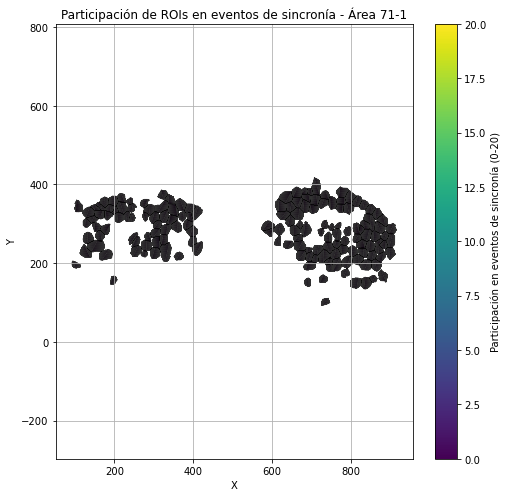

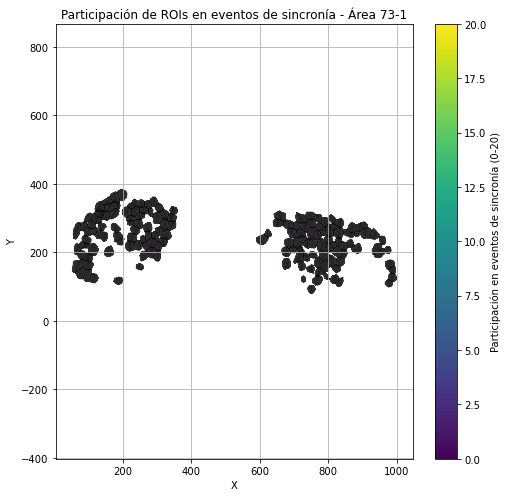

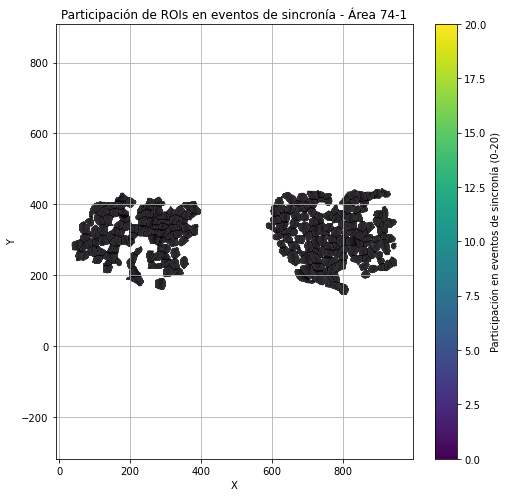

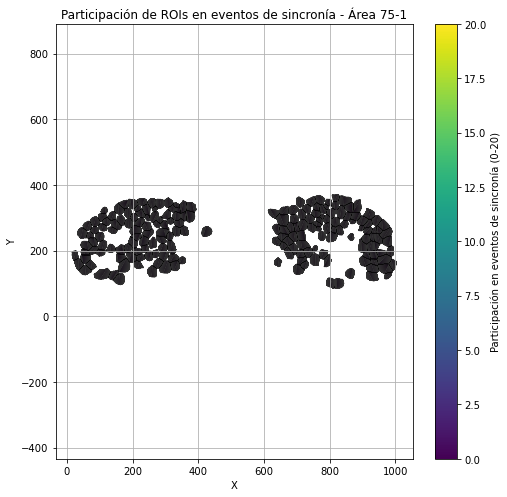

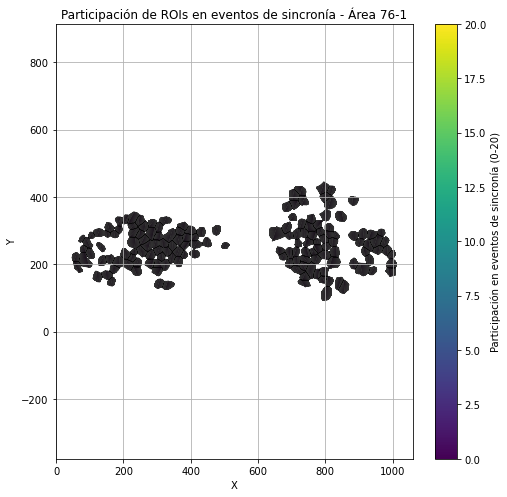

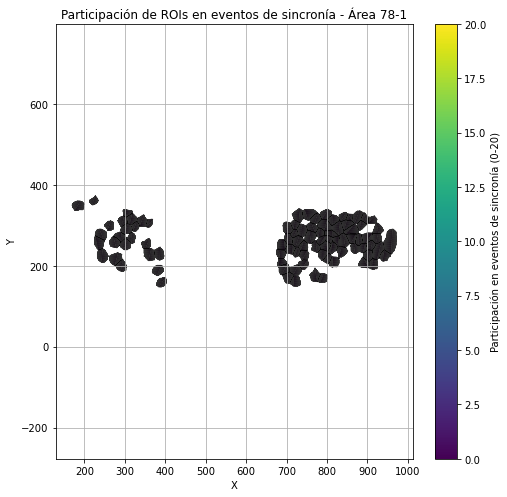

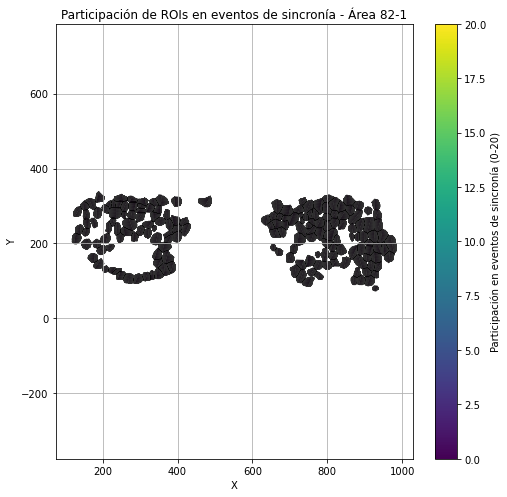

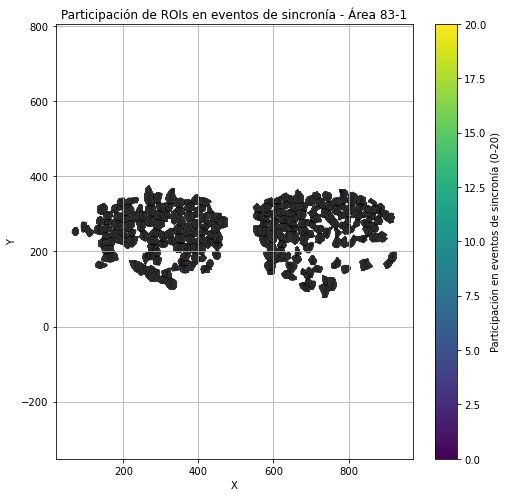

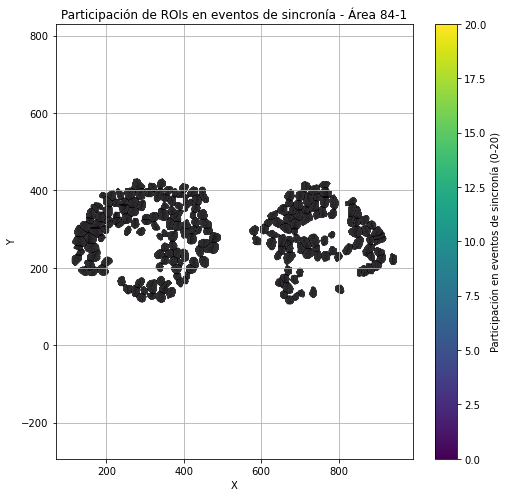

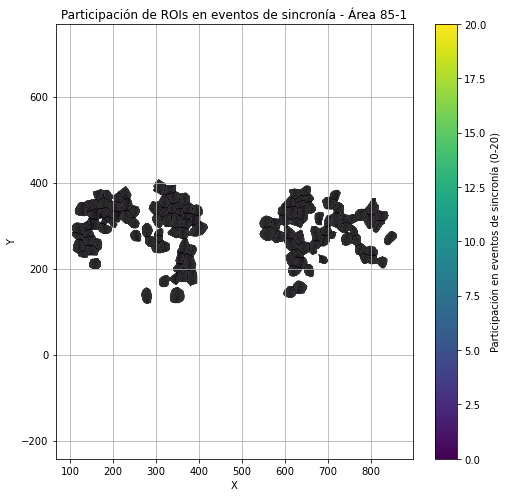

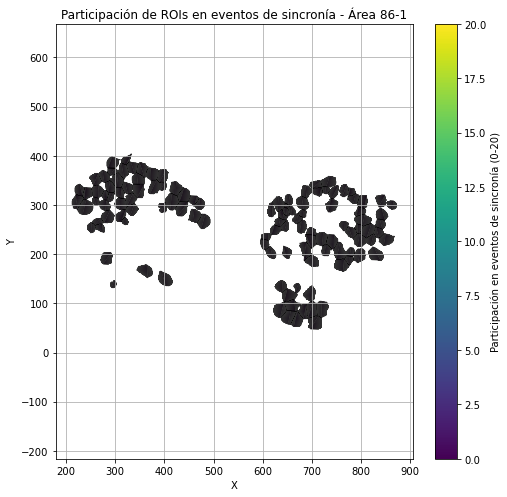

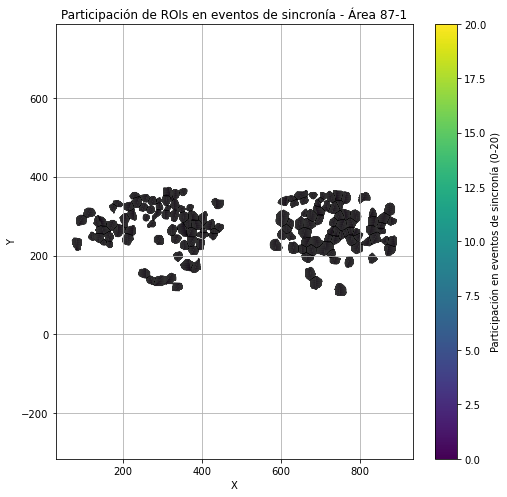

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.ndimage import gaussian_filter1d
from matplotlib import cm

# Definir el rango de frames de interés
frame_start = 140
frame_end = 160

for key in areas:
    if '52' not in key and key[0] in ['7', '8']:
        # Inicializar un array para contar la participación de cada ROI en los eventos de sincronía
        roi_sync_count = np.zeros(len(areas[key].contours['Hb']))

        for j in range(len(areas[key].trials)):
            if areas[key].trials[j].vis == 0 and areas[key].trials[j].aud == 1:
                # Convertir la lista de listas a un array de numpy para manipularlo fácilmente
                data_array = areas[key].trials[j].roi_dffs["Hb"][areas[key].roi_lefties['Hb'] == True]

                # Realizar clustering jerárquico para encontrar la similitud entre filas
                Z = linkage(data_array, method='centroid')
                row_order = leaves_list(Z)

                # Reordenar las filas del array de datos según el orden calculado
                sorted_data_array = data_array[row_order, :]

                # Normalizar los datos
                data_z = sorted_data_array - np.expand_dims(np.mean(sorted_data_array, axis=1), axis=1)
                data_z = data_z / np.expand_dims(np.std(data_z, axis=1), axis=1)

                # Promediar los datos y aplicar filtro gaussiano
                promedio_data_z = data_z.mean(axis=0)
                promedio_filtrado = gaussian_filter1d(promedio_data_z, 3)
                mascara_th = promedio_filtrado > 0.4

                # Encontrar los índices de inicio de los momentos de sincronía
                start_indices = np.where((mascara_th[:-1] == False) & (mascara_th[1:] == True))[0] + 1
                if mascara_th[0] == True:
                    start_indices = np.insert(start_indices, 0, 0)

                # Almacenar momentos de sincronía
                momentos_sincronia = start_indices

                # Contar participación de cada ROI en eventos de sincronía entre los frames 140 y 160
                for momento in momentos_sincronia:
                    if frame_start <= momento <= frame_end:
                        # Identificar unidades activas en este momento
                        unidades_activas = np.where(sorted_data_array[:, momento] > 0)[0]
                        # Incrementar el contador de cada ROI que participa
                        roi_sync_count[unidades_activas] += 1

        # Graficar el template de las ROIs coloreadas según la cantidad de eventos de sincronía
        plt.figure(figsize=(8, 8))
        ax = plt.gca()
        ax.set_title(f'Participación de ROIs en eventos de sincronía - Área {key}')

        # Normalizar el conteo de eventos para los colores
        norm_counts = roi_sync_count / 20  # 20 es el máximo posible (número de trials)
        cmap = cm.get_cmap('viridis')  # Colormap para visualizar la escala

        # Dibujar cada ROI con el color correspondiente
        for i, contour in enumerate(areas[key].contours['Hb']):
            # Extraer los puntos del contorno de la ROI
            polygon = np.array(contour)
            # Determinar el color basado en la participación normalizada
            color = cmap(norm_counts[i])

            # Dibujar el polígono y rellenar con el color calculado
            ax.fill(polygon[:, 0], polygon[:, 1], color=color, edgecolor='black', alpha=0.8)

        # Mostrar la barra de color para referencia de la participación
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=20))
        sm.set_array([])
        plt.colorbar(sm, ax=ax, label='Participación en eventos de sincronía (0-20)')

        plt.axis('equal')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.grid(True)
        plt.show()


IndexError: index 62 is out of bounds for axis 0 with size 62

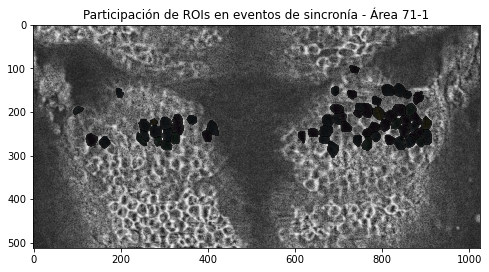

In [22]:
# import numpy as np
# import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.ndimage import gaussian_filter1d
from matplotlib import cm

# Definir el rango de frames de interés
frame_start = 140
frame_end = 160
min_frames_activos = 2  # Mínimo de frames con valor 1 para considerar un ROI activo

for key in areas:
    if '52' not in key and key[0] in ['7', '8']:
        # Inicializar un array para contar la participación de cada ROI en los eventos de sincronía.
        # Ajustar la longitud a la cantidad de ROIs presentes en 'roi_lefties' que son True.
        num_rois = np.sum(areas[key].roi_lefties['Hb'] == True)
        roi_sync_count = np.zeros(num_rois)

        for j in range(len(areas[key].trials)):
            if areas[key].trials[j].vis == 0 and areas[key].trials[j].aud == 1:
                # Obtener el array binario que indica la actividad de cada ROI en cada frame.
                binary_activity = areas[key].trials[j].roi_binaries["Hb"][areas[key].roi_lefties['Hb'] == True]

                # Filtrar la actividad binaria en el rango de frames de interés.
                binary_activity_rango = binary_activity[:, frame_start:frame_end + 1]

                # Identificar los ROIs que tienen al menos `min_frames_activos` frames activos (valor 1).
                rois_activos = np.sum(binary_activity_rango, axis=1) >= min_frames_activos

                # Incrementar el contador de participación para los ROIs que estuvieron activos en este trial.
                roi_sync_count[rois_activos] += 1

        # Determinar el máximo de participación para ajustar la escala de color.
        max_participacion = np.max(roi_sync_count)

        # Graficar el template de fondo y las ROIs coloreadas según la cantidad de eventos de sincronía.
        plt.figure(figsize=(8, 8))
        ax = plt.gca()
        ax.set_title(f'Participación de ROIs en eventos de sincronía - Área {key}')

        # Mostrar el template de fondo.
        ax.imshow(areas[key].template, cmap='gray', origin='upper')

        # Normalizar el conteo de eventos para los colores usando el máximo de participación.
        norm_counts = roi_sync_count / max_participacion if max_participacion > 0 else roi_sync_count
        cmap = cm.get_cmap('viridis')  # Colormap para visualizar la escala.

        # Dibujar cada ROI con el color correspondiente.
        for i, contour in enumerate(areas[key].contours['Hb']):
            # Extraer los puntos del contorno de la ROI.
            polygon = np.array(contour)
            # Determinar el color basado en la participación normalizada.
            color = cmap(norm_counts[i])

            # Dibujar el polígono y rellenar con el color calculado.
            ax.fill(polygon[:, 0], polygon[:, 1], color=color, edgecolor='black', alpha=0.8)

        # Mostrar la barra de color para referencia de la participación.
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=max_participacion))
        sm.set_array([])
        plt.colorbar(sm, ax=ax, label=f'Participación en eventos de sincronía (0-{int(max_participacion)})')

        plt.axis('equal')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.grid(True)
        plt.show()


In [87]:
areas["50-0"].trials[0].__dict__.keys()

dict_keys(['data', 'trial', 'fecha', 'microscopio', 'pez', 'area', 'region', 'width', 'height', 'fps', 'nframes', 'total_time', 'loom_end_time', 'loom_vanish_time', 'sound_time', 'vis', 'aud', 'region_list', 'video', 'roi_activities', 'grid_activities', 'roi_dffs', 'roi_baselines', 'roi_binaries', 'roi_smooth_dffs'])

In [91]:
print('Visual: ', areas["50-1"].trials[0].vis, ', Aud: ', areas["50-1"].trials[0].aud)

Visual:  0 , Aud:  0.0


In [209]:
areas['29-0'].__dict__.keys()

dict_keys(['pez', 'n', 'trials', 'template', 'polygons_per_area', 'subtemplates', 'fecha', 'x', 'y', 'z', 'regions', 'template_small', 'factor', 'polygons_per_area_small', 'midline_points', 'grids', 'contours', 'centers', 'contours_small', 'centers_small', 'grid_lefties', 'roi_lefties', 'stack', 'm_rig'])

In [212]:
areas['29-0'].trials[0].__dict__.keys()

dict_keys(['data', 'trial', 'fecha', 'microscopio', 'pez', 'area', 'region', 'width', 'height', 'fps', 'nframes', 'total_time', 'loom_end_time', 'loom_vanish_time', 'sound_time', 'vis', 'aud', 'region_list', 'video', 'roi_activities', 'grid_activities', 'roi_dffs', 'roi_baselines', 'roi_binaries', 'roi_smooth_dffs'])

In [214]:
areas['29-0'].trials[0].roi_activities['Hb']

array([[19.19269637, 18.39264873, 18.26326737, ..., 15.20148782,
        14.50060556, 15.52134794],
       [12.4409417 , 14.03624132, 13.13050503, ..., 12.52877384,
        12.97672272, 11.74679396],
       [13.65283953, 12.85710385, 13.06575628, ..., 13.01546866,
        13.03782252, 12.3446409 ],
       ...,
       [34.8073412 , 38.69834303, 38.6196926 , ..., 40.74066693,
        45.48021399, 38.18658182],
       [34.0873074 , 34.05466489, 35.12141475, ..., 42.65947356,
        33.20694083, 38.66812247],
       [21.7977651 , 23.48167419, 22.258756  , ..., 18.65081278,
        18.42925262, 21.069664  ]])

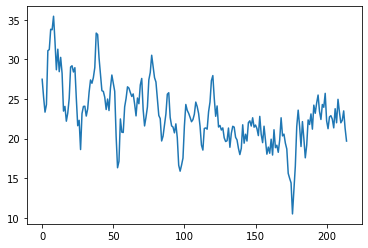

In [31]:
plt.plot(areas["74-1"].trials[5].roi_activities["Hb"][7])

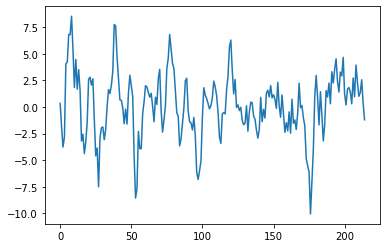

In [30]:
plt.plot(areas["74-1"].trials[5].roi_dffs["Hb"][7])


In [288]:
start_indices

array([ 2,  8, 16, 23], dtype=int64)

In [24]:
planos = '1'
vis_con = 0
aud_con = 1
leftie = True
key = '74-1'
i=0
for trial in areas[key].trials:
    i+=1
    if trial.vis == vis_con and trial.aud == aud_con and key[-1] == planos:
        data_array = trial.roi_dffs["Hb"][areas[key].roi_lefties['Hb'] == leftie]

        # Encontrar el primer evento en cada fila
        first_event_indices = np.argmax(data_array, axis=1)
        sorted_indices = np.argsort(first_event_indices)
        sorted_data_array = data_array[sorted_indices]

        data_z = sorted_data_array - np.expand_dims(np.mean(sorted_data_array, axis=1), axis=1)
        data_z = data_z / np.expand_dims(np.std(data_z, axis=1), axis=1)
        # kernel = np.array([1,4, 6,4, 1]) / 16
        kernel = np.array([1,2, 1]) / 4
        promedio_data_z = data_z.mean(axis=0)
        # promedio_data_z_filtrada  =  gaussian_filter1d(promedio_data_z, sigma=1)
        promedio_data_z_filtrada  = np.convolve(promedio_data_z, kernel, mode='same')
        umbral = .3
        mascara_th = promedio_data_z_filtrada > umbral
        start_indices = np.where((mascara_th[:-1] == False) & (mascara_th[1:] == True))[0] +1
        if mascara_th[0]:
            start_indices = np.insert(start_indices, 0, 0)

        momentos_sincronia.extend(start_indices)

        # Crear el raster plot utilizando imshow
        plt.figure(figsize=(12, 8))
        plt.imshow(sorted_data_array, aspect='auto', cmap='Greys', interpolation='nearest')

        # Configurar el eje para mejorar la visualización
        plt.colorbar(label='Intensidad')  # Añadir una barra de colores para referencia
        plt.xlabel('Tiempo')
        plt.ylabel('Neurona / Unidad')
        plt.title(f'Histograma de sincronización (Vis {vis_con}, Aud {aud_con}, Leftie {leftie}, Plano {planos}, Trial {i})')
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(11.5, 8))
        plt.title(f'Histograma de sincronización (Vis {vis_con}, Aud {aud_con}, Leftie {leftie}, Plano {planos}, Trial {i})')

        plt.plot(promedio_data_z, color='#1f77b4')
        plt.plot(promedio_data_z_filtrada, '.', color='#ff7f0e')
        plt.plot(promedio_data_z_filtrada, color='#ff7f0e')
        plt.plot(np.arange(0, len(promedio_data_z)), np.ones_like(promedio_data_z)*umbral, color='green')
        plt.scatter(start_indices, np.ones_like(start_indices)*umbral, color='green')
        plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'extend'

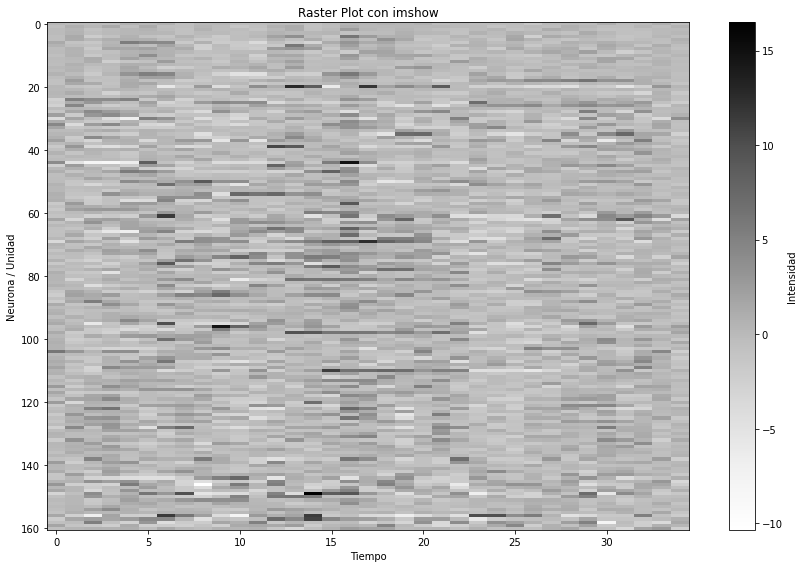

In [279]:
# Convertir la lista de listas a un array de numpy para usar con imshow
data_array = areas["29-0"].trials[2].roi_dffs["Hb"]

# Crear el raster plot utilizando imshow
plt.figure(figsize=(12, 8))
plt.imshow(data_array, aspect='auto', cmap='Greys', interpolation='nearest')

# Configurar el eje para mejorar la visualización
plt.colorbar(label='Intensidad')  # Añadir una barra de colores para referencia
plt.xlabel('Tiempo')
plt.ylabel('Neurona / Unidad')
plt.title('Raster Plot con imshow')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

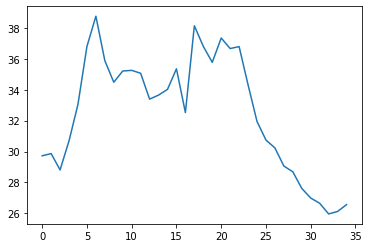

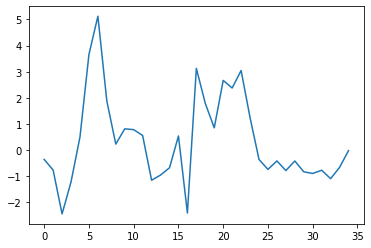

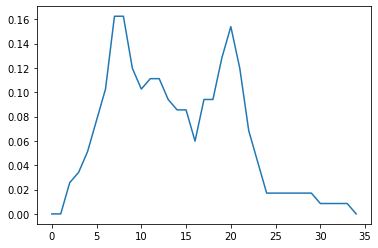

In [184]:
i = '2'
plt.plot(areas["29-"+i].trials[5].roi_activities["Hb"].mean(axis=0))
plt.show()
plt.plot(areas["29-"+i].trials[5].roi_dffs["Hb"].mean(axis=0))
plt.show()
plt.plot(areas["29-"+i].trials[5].roi_binaries["Hb"].mean(axis=0))
plt.show()

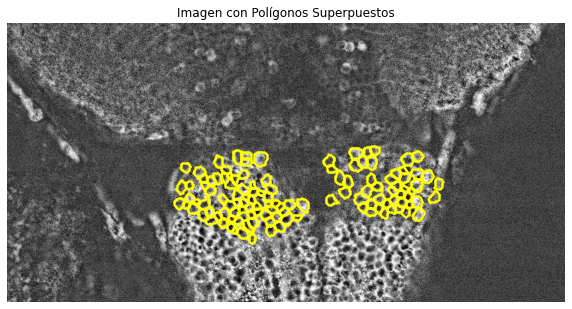

In [23]:

plt.figure(figsize=(10, 8))
key = '26-1'
plt.imshow(areas[key].template, cmap='gray')

# Supongamos que el array que contiene los contornos de los polígonos se llama `polygons`
polygons = areas[key].contours['Hb']

# Dibujar cada polígono en la imagen
for polygon in polygons:
    x_coords = polygon[:, 0]
    y_coords = polygon[:, 1]
    plt.scatter(x_coords, y_coords,  linestyle='-', color='yellow', s=1)

# Mostrar la imagen con los polígonos superpuestos
plt.title('Imagen con Polígonos Superpuestos')
plt.axis('off')  # Opcional: oculta los ejes
plt.show()

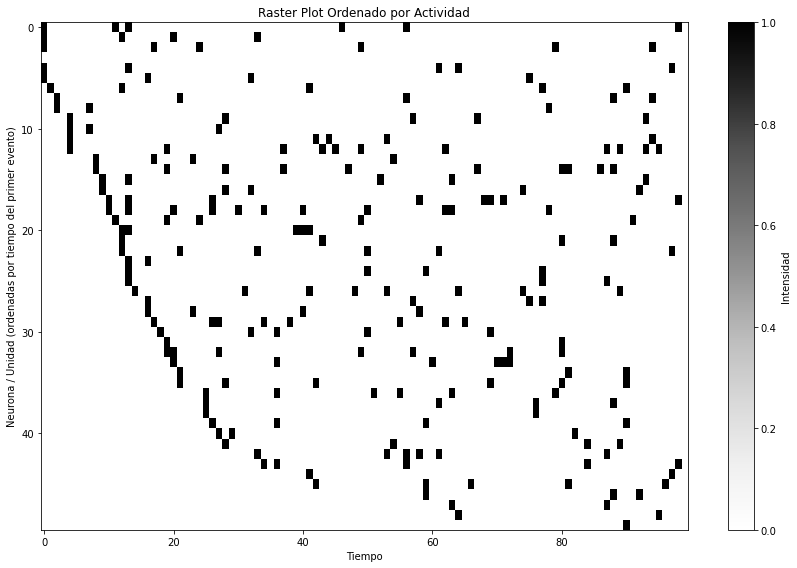

In [122]:
import matplotlib.pyplot as plt
import numpy as np

# Generar datos de ejemplo si aún no tienes los tuyos
# data = [np.random.rand(100) > 0.95 for _ in range(50)]

# Convertir la lista de listas a un array de numpy para manipularlo fácilmente
data_array = np.array(data, dtype=int)

# Encontrar el primer evento (máximo) en cada fila
first_event_indices = np.argmax(data_array, axis=1)

# Ordenar las filas según el índice del primer evento
sorted_indices = np.argsort(first_event_indices)
sorted_data_array = data_array[sorted_indices]

# Crear el raster plot utilizando imshow con los datos ordenados
plt.figure(figsize=(12, 8))
plt.imshow(sorted_data_array, aspect='auto', cmap='Greys', interpolation='nearest')
# plt.imshow(data, aspect='auto', cmap='Greys', interpolation='nearest')

# Configurar el eje para mejorar la visualización
plt.colorbar(label='Intensidad')
plt.xlabel('Tiempo')
plt.ylabel('Neurona / Unidad (ordenadas por tiempo del primer evento)')
plt.title('Raster Plot Ordenado por Actividad')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [44]:
import numpy as np

# Tu array de ejemplo
arr = np.array([False, True, True, False, True, True, True, False, True, False])

# Encuentra los índices donde comienza cada intervalo de True continuos
start_indices = np.where((arr[:-1] == False) & (arr[1:] == True))[0] + 1

# Si el primer elemento es True, incluirlo también
if arr[0] == True:
    start_indices = np.insert(start_indices, 0, 0)

print("Índices de inicio de cada intervalo de True:", start_indices)


Índices de inicio de cada intervalo de True: [1 4 8]


In [375]:
areas[key].trials[j].roi_dffs.keys()

dict_keys(['Hb', 'palium'])

In [390]:
areas['30-1'].trials[0].__dict__.keys()

dict_keys(['data', 'trial', 'fecha', 'microscopio', 'pez', 'area', 'region', 'width', 'height', 'fps', 'nframes', 'total_time', 'loom_end_time', 'loom_vanish_time', 'sound_time', 'vis', 'aud', 'region_list', 'video', 'roi_activities', 'grid_activities', 'roi_dffs', 'roi_baselines', 'roi_binaries', 'roi_smooth_dffs'])

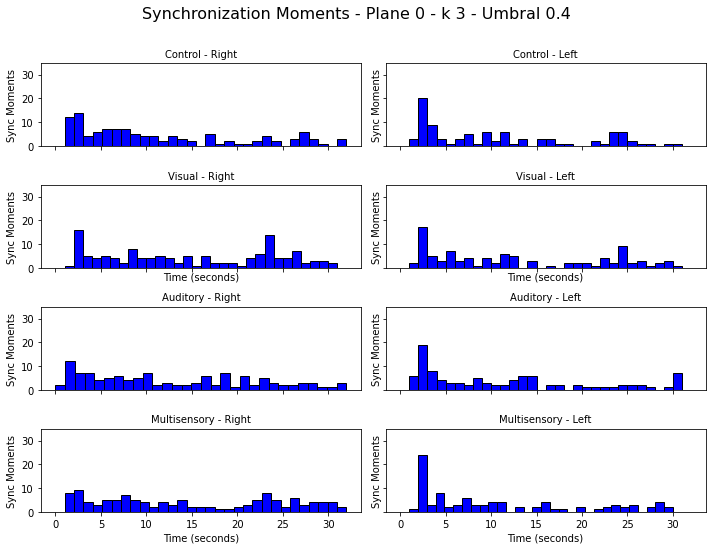

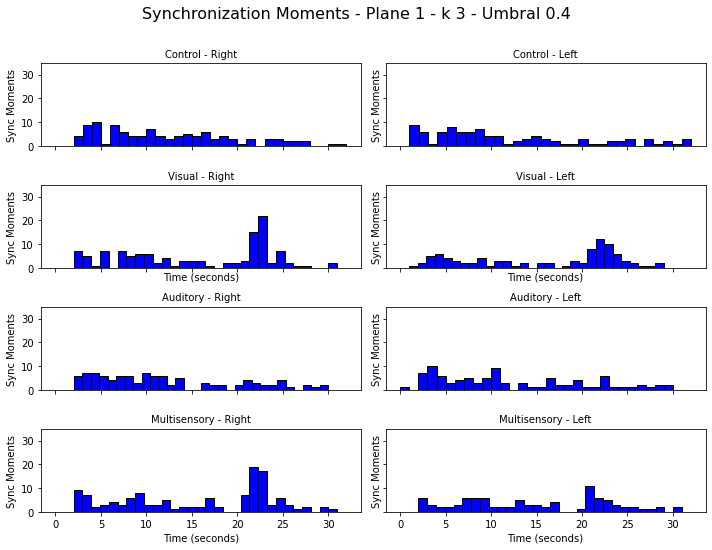

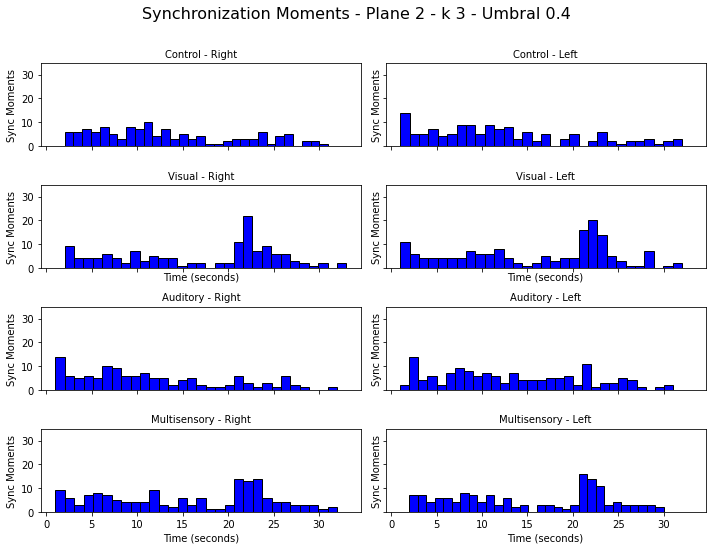

In [386]:
import numpy as np
import matplotlib.pyplot as plt

# Definir los niveles de las variables
aud_con_values = [0, 1]
vis_con_values = [0, 1]
leftie_values = [True, False]
planos_values = ['0', '1', '2']

# Crear un diccionario de etiquetas para los títulos
trial_labels = {
    (1, 0): "Auditory",
    (0, 1): "Visual",
    (1, 1): "Multisensory",
    (0, 0): "Control"
}

# Crear una figura por cada altura de `planos`
for planos in planos_values:
    fig, axes = plt.subplots(len(aud_con_values) * len(vis_con_values), len(leftie_values),
                             figsize=(10, 8), sharex=True, sharey=True)
    umbral = .4
    # kernel = np.array([1,2, 4,2, 1]) / 10
    kernel = np.array([1,2, 1]) / 4
    fig.suptitle(f"Synchronization Moments - Plane {planos} - k {len(kernel)} - Umbral {umbral}", fontsize=16)

    for i, aud_con in enumerate(aud_con_values):
        for j, vis_con in enumerate(vis_con_values):
            for k, leftie in enumerate(leftie_values):
                momentos_sincronia = []

                # Iterar sobre las áreas
                for key in areas:
                    if '52' not in key:
                        for trial in areas[key].trials:
                            if trial.vis == vis_con and trial.aud == aud_con and key[-1] == planos:
                                data_array = trial.roi_dffs["Hb"][areas[key].roi_lefties['Hb'] == leftie]

                                # Encontrar el primer evento en cada fila
                                first_event_indices = np.argmax(data_array, axis=1)
                                sorted_indices = np.argsort(first_event_indices)
                                sorted_data_array = data_array[sorted_indices]

                                # data_z = sorted_data_array - np.expand_dims(np.mean(sorted_data_array, axis=1), axis=1)
                                # data_z = data_z / np.expand_dims(np.std(data_z, axis=1), axis=1)

                                # promedio_data_z = data_z.mean(axis=0)
                                # mascara_th = promedio_data_z > 0.4
                                # start_indices = np.where((mascara_th[:-1] == False) & (mascara_th[1:] == True))[0] + 1
                                # if mascara_th[0]:
                                #     start_indices = np.insert(start_indices, 0, 0)

                                # momentos_sincronia.extend(start_indices)




                                data_z = sorted_data_array - np.expand_dims(np.mean(sorted_data_array, axis=1), axis=1)
                                data_z = data_z / np.expand_dims(np.std(data_z, axis=1), axis=1)

                                promedio_data_z = data_z.mean(axis=0)
                                # promedio_data_z_filtrada  =  gaussian_filter1d(promedio_data_z, sigma=1)
                                promedio_data_z_filtrada  = np.convolve(promedio_data_z, kernel, mode='same')
                                
                                mascara_th = promedio_data_z_filtrada > umbral
                                start_indices = np.where((mascara_th[:-1] == False) & (mascara_th[1:] == True))[0] + 1
                                if mascara_th[0]:
                                    start_indices = np.insert(start_indices, 0, 0)

                                momentos_sincronia.extend(start_indices)

                # Definir la posición del subplot
                ax = axes[i * len(vis_con_values) + j, k]
                
                if momentos_sincronia:
                    ax.hist(momentos_sincronia, bins=30, color='blue', edgecolor='black')
                    ax.set_ylim(0,35)
                ax.set_ylabel("Sync Moments", fontsize=10)
                if j == len(vis_con_values) - 1:
                    ax.set_xlabel("Time (seconds)", fontsize=10)

                # Título de cada subplot
                condition_label = trial_labels[(aud_con, vis_con)]
                side_label = "Right" if leftie else "Left"
                ax.set_title(f"{condition_label} - {side_label}", fontsize=10)

    # Ajustar el diseño y guardar la figura
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.savefig(f"histogram_plane_{planos}_k{len(kernel)}_u{int(umbral*10)}-10.png", bbox_inches='tight', facecolor='white')
    plt.show()

In [387]:
os.getcwd()

'C:\\Users\\PC\\Desktop\\Analisis conf\\PKL 11-2024'

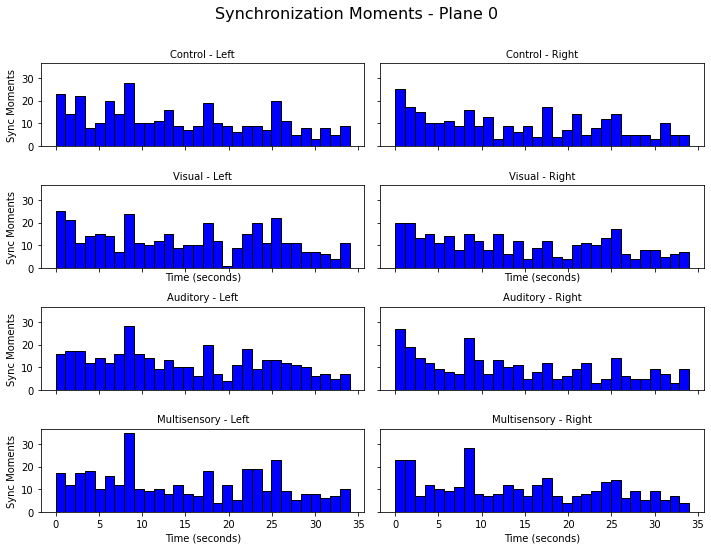

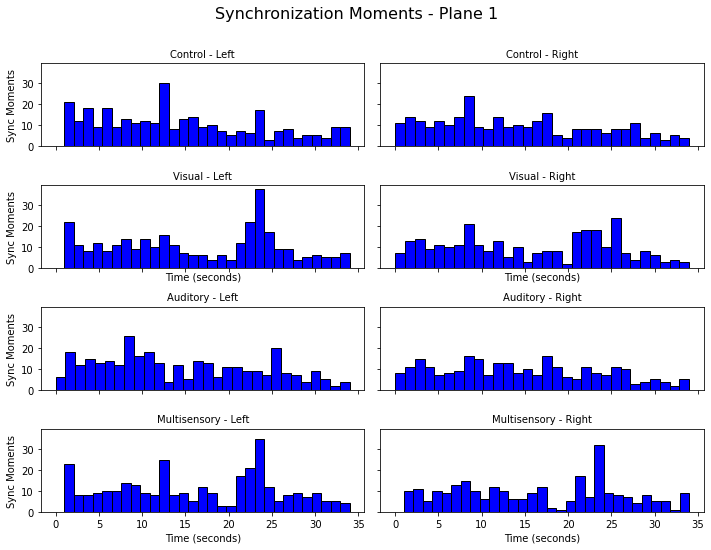

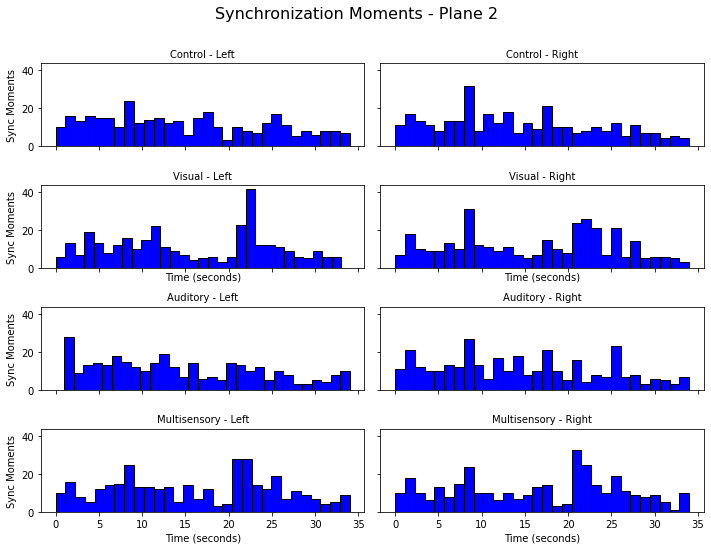

In [190]:
import numpy as np
import matplotlib.pyplot as plt

# Definir los niveles de las variables
aud_con_values = [0, 1]
vis_con_values = [0, 1]
leftie_values = [True, False]  # True a la izquierda, False a la derecha
planos_values = ['0', '1', '2']

# Crear un diccionario de etiquetas para los títulos
trial_labels = {
    (1, 0): "Auditory",
    (0, 1): "Visual",
    (1, 1): "Multisensory",
    (0, 0): "Control"
}

# Crear una figura por cada altura de `planos`
for planos in planos_values:
    fig, axes = plt.subplots(len(aud_con_values) * len(vis_con_values), len(leftie_values),
                             figsize=(10, 8), sharex=True, sharey=True)

    fig.suptitle(f"Synchronization Moments - Plane {planos}", fontsize=16)

    for i, aud_con in enumerate(aud_con_values):
        for j, vis_con in enumerate(vis_con_values):
            for k, leftie in enumerate([True, False]):  # Organizar leftie=True a la izquierda
                momentos_sincronia = []

                # Iterar sobre las áreas
                for key in areas:
                    if '52' not in key:
                        for trial in areas[key].trials:
                            # if trial.vis == vis_con and trial.aud == aud_con and key[-1] == planos:
                            if trial.vis == vis_con and trial.aud == aud_con and key[-1] == planos:
                                data_array = trial.roi_dffs["Hb"][areas[key].roi_lefties['Hb'] == leftie]

                                # Encontrar el primer evento en cada fila
                                first_event_indices = np.argmax(data_array, axis=1)
                                sorted_indices = np.argsort(first_event_indices)
                                sorted_data_array = data_array[sorted_indices]

                                data_z = sorted_data_array - np.expand_dims(np.mean(sorted_data_array, axis=1), axis=1)
                                data_z = data_z / np.expand_dims(np.std(data_z, axis=1), axis=1)

                                promedio_data_z = data_z.mean(axis=0)
                                mascara_th = promedio_data_z > 0.4
                                start_indices = np.where((mascara_th[:-1] == False) & (mascara_th[1:] == True))[0] + 1
                                if mascara_th[0]:
                                    start_indices = np.insert(start_indices, 0, 0)

                                momentos_sincronia.extend(start_indices)

                # Definir la posición del subplot
                ax = axes[i * len(vis_con_values) + j, k]

                if momentos_sincronia:
                    ax.hist(momentos_sincronia, bins=30, color='blue', edgecolor='black')

                # Mantener números en eje Y pero quitar el nombre excepto en la primera columna
                if k == 0:
                    ax.set_ylabel("Sync Moments", fontsize=10)
                else:
                    ax.set_ylabel("")  # Elimina solo el texto, pero deja los números

                # Solo agregar etiquetas del eje X en la última fila
                if j == len(vis_con_values) - 1:
                    ax.set_xlabel("Time (seconds)", fontsize=10)

                # Título de cada subplot
                condition_label = trial_labels[(aud_con, vis_con)]
                side_label = "Left" if leftie else "Right"
                ax.set_title(f"{condition_label} - {side_label}", fontsize=10)

    # Ajustar el diseño y guardar la figura
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    # plt.savefig(f"histogram_plane_{planos}.png", bbox_inches='tight', facecolor='white')
    plt.show()


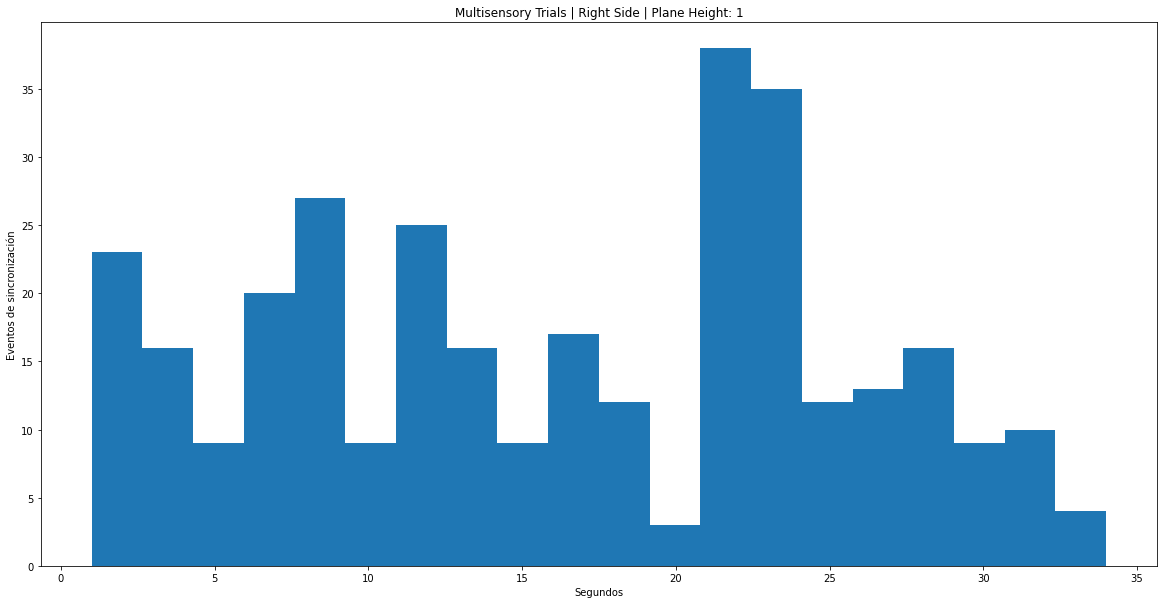

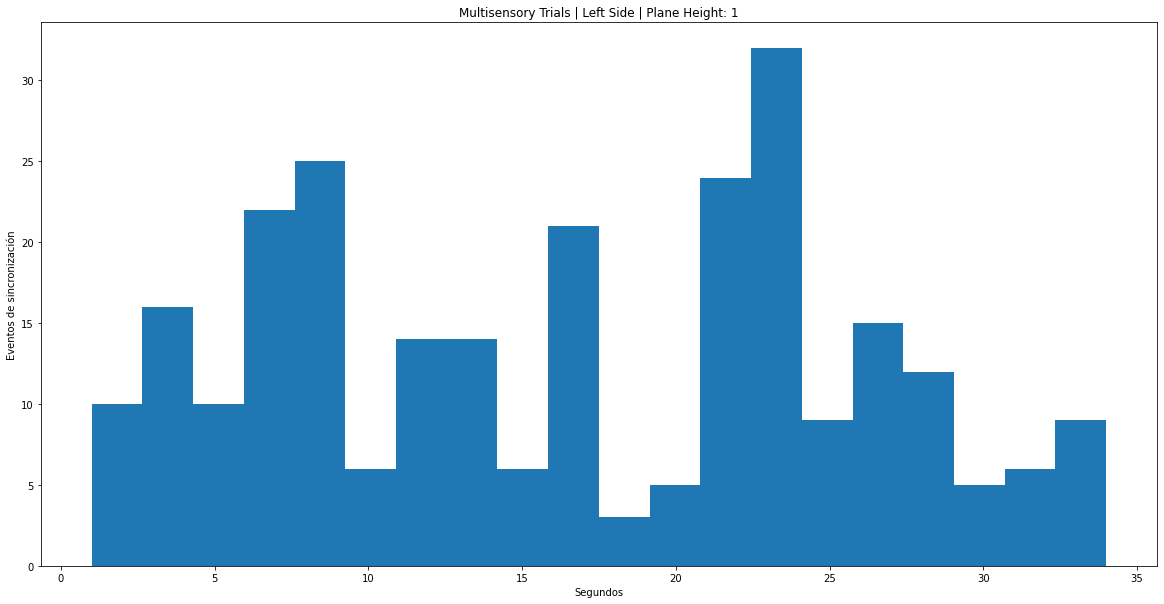

In [ ]:
# from scipy.cluster.hierarchy import linkage, leaves_list
for aud_con in [0,1]:
# for aud_con in [1]:
    for vis_con in [0,1]:
    # for vis_con in [1]:
        for leftie in [True, False]:
            for planos in ['0', '1', '2']:
            # for planos in ['1']:
                momentos_sincronia = []
                # key = '10-1'
                for key in areas:
                    if '52' not in key:
                        for j in range(len(areas[key].trials)):
                            if  areas[key].trials[j].vis ==vis_con and areas[key].trials[j].aud == aud_con and key[-1]==planos :
                                # Convertir la lista de listas a un array de numpy para manipularlo fácilmente
                                data_array = areas[key].trials[j].roi_dffs["Hb"][areas[key].roi_lefties['Hb']==leftie]
                                # data_array = areas[key].trials[j].roi_dffs["Hb"]

                                # # Realizar clustering jerárquico para encontrar la similitud entre filas
                                # Z = linkage(data_array, method='centroid')
                                # row_order = leaves_list(Z)

                                # # Reordenar las filas del array de datos según el orden calculado
                                # final_sorted_data_array = data_array[row_order, :]

                                #Oredenado al primer evento 
                                
                                # Encontrar el primer evento (máximo) en cada fila
                                first_event_indices = np.argmax(data_array, axis=1)

                                # Ordenar las filas según el índice del primer evento
                                sorted_indices = np.argsort(first_event_indices)
                                sorted_data_array = data_array[sorted_indices]


                                data_z = sorted_data_array-np.expand_dims(np.mean(sorted_data_array, axis=1), axis=1)
                                data_z = data_z/np.expand_dims(np.std(data_z, axis=1), axis=1)

                                promedio_data_z = data_z.mean(axis=0)
                                # promedio_filtrado = gaussian_filter1d(promedio_data_z, 2)
                                promedio_filtrado = promedio_data_z
                                mascara_th = promedio_filtrado>.4
                                indices_mascara = np.where(mascara_th)

                                start_indices = np.where((mascara_th[:-1] == False) & (mascara_th[1:] == True))[0] + 1
                                if mascara_th[0] == True:
                                    start_indices = np.insert(start_indices, 0, 0)
                                # # Crear el raster plot utilizando imshow con las filas ordenadas y el colormap cividis
                                # plt.figure(figsize=(12, 8))
                                # # plt.imshow(final_sorted_data_array, aspect='auto', cmap='cividis', interpolation='nearest')
                                # # plt.imshow(data_array, aspect='auto', cmap='cividis', interpolation='nearest')
                                # plt.imshow(data_z, aspect='auto', cmap='cividis', interpolation='nearest')
                                # # plt.imshow(sorted_data_array, aspect='auto', cmap='cividis', interpolation='nearest')

                                # # Configurar el eje para mejorar la visualización
                                # plt.colorbar(label='Intensidad')
                                # plt.xlabel('Tiempo (orden de columnas fijo)') 
                                # plt.ylabel('Neurona / Unidad (ordenadas por similitud)')
                                # plt.title('Vis '+f'{areas[key].trials[j].vis}'+', Aud '+f'{areas[key].trials[j].aud}')
                                # plt.tight_layout()

                                # # Mostrar el gráfico
                                # plt.show()
                                # plt.plot(data_z.mean(axis=0))
                                # plt.plot(promedio_filtrado)
                                # plt.scatter(indices_mascara, promedio_filtrado[mascara_th])

                                # plt.scatter(start_indices, promedio_filtrado[start_indices], color='r')
                                # plt.show()
                                momentos_sincronia.extend(start_indices)
                plt.figure(figsize=(20,10),facecolor='white')
                title,title_s = generate_title(aud_con, vis_con, leftie, planos)
                plt.title(title)
                plt.hist(np.array(momentos_sincronia), bins=20)
                plt.xlabel('Segundos')
                plt.ylabel('Eventos de sincronización')
                plt.savefig(title_s)
                plt.show()


In [236]:
areas[key].__dict__.keys()

dict_keys(['pez', 'n', 'trials', 'template', 'polygons_per_area', 'subtemplates', 'fecha', 'x', 'y', 'z', 'regions', 'template_small', 'factor', 'polygons_per_area_small', 'midline_points', 'grids', 'contours', 'centers', 'contours_small', 'centers_small', 'grid_lefties', 'roi_lefties', 'stack', 'm_rig'])

In [239]:
areas[key].trials[j].data['Edad']

10.0

In [ ]:
# Iterar sobre combinaciones de condiciones
for aud_con in [0,1]:
    for vis_con in [0,1]:
        for leftie in [True, False]:
            for planos in ['0', '1', '2']:
                momentos_sincronia = []
                areas_por_bin = []
                
                for key in areas:
                    if '52' not in key:
                        for j in range(len(areas[key].trials)):
                            if  areas[key].trials[j].vis == vis_con and areas[key].trials[j].aud == aud_con and key[-1] == planos:
                                
                                data_array = areas[key].trials[j].roi_dffs["Hb"][areas[key].roi_lefties['Hb'] == leftie]
                                
                                # Encontrar el primer evento (máximo) en cada fila
                                first_event_indices = np.argmax(data_array, axis=1)
                                sorted_indices = np.argsort(first_event_indices)
                                sorted_data_array = data_array[sorted_indices]
                                
                                # Normalización
                                data_z = sorted_data_array - np.expand_dims(np.mean(sorted_data_array, axis=1), axis=1)
                                data_z = data_z / np.expand_dims(np.std(sorted_data_array, axis=1), axis=1)
                                
                                # Promedio
                                promedio_data_z = data_z.mean(axis=0)
                                mascara_th = promedio_data_z > 0.4
                                start_indices = np.where((mascara_th[:-1] == False) & (mascara_th[1:] == True))[0] + 1
                                if mascara_th[0] == True:
                                    start_indices = np.insert(start_indices, 0, 0)
                                
                                # Guardar eventos con su respectiva área
                                for event in start_indices:
                                    momentos_sincronia.append(event)
                                    areas_por_bin.append(key)
                
                # Convertir a array para análisis
                momentos_sincronia = np.array(momentos_sincronia)
                areas_por_bin = np.array(areas_por_bin)
                
                # Crear histogramas
                fig, ax1 = plt.subplots(figsize=(20, 10))
                bineado = np.linspace(0, 35, 22)
                n, bins, patches = ax1.hist(momentos_sincronia, bins=bineado, edgecolor="black", alpha=0.6)
                ax1.set_xlabel('Segundos')
                ax1.set_ylabel('Eventos de sincronización')
                ax1.set_title(f'Histograma de sincronización (Vis {vis_con}, Aud {aud_con}, Leftie {leftie}, Plano {planos})')
                ax1.set_ylim(0,45)
                
                # Contar cuántas áreas distintas participan en cada bin
                areas_distintas_por_bin = []
                for i in range(len(bins) - 1):
                    indices_bin = (momentos_sincronia >= bins[i]) & (momentos_sincronia < bins[i+1])
                    areas_en_bin = np.unique(areas_por_bin[indices_bin])
                    areas_distintas_por_bin.append(len(areas_en_bin))
                    
                    # Agregar el número de áreas contribuyentes dentro de cada barra del histograma
                    ax1.text((bins[i] + bins[i+1]) / 2, n[i], str(areas_distintas_por_bin[-1]), 
                             ha='center', va='bottom', fontsize=12, fontweight='bold')
                
                # Crear DataFrame con la información de áreas por bin
                df_areas_bin = pd.DataFrame({
                    "Bin Start": bins[:-1],
                    "Bin End": bins[1:],
                    "Eventos de Sincronización": n,
                    "Áreas Distintas Contribuyentes": areas_distintas_por_bin
                })
                
                # Mostrar tabla con la información
                # print(df_areas_bin)
                
                # Guardar el histograma generado
                title, title_s = generate_title(aud_con, vis_con, leftie, planos)
                # plt.savefig(title_s)
                plt.show()


In [264]:
n[0,:]

array([ 1.,  4.,  0.,  1.,  3.,  0.,  3.,  6.,  0.,  2.,  1.,  0., 13.,
        6.,  2.,  2.,  5.,  2.,  1.,  0.,  0.])

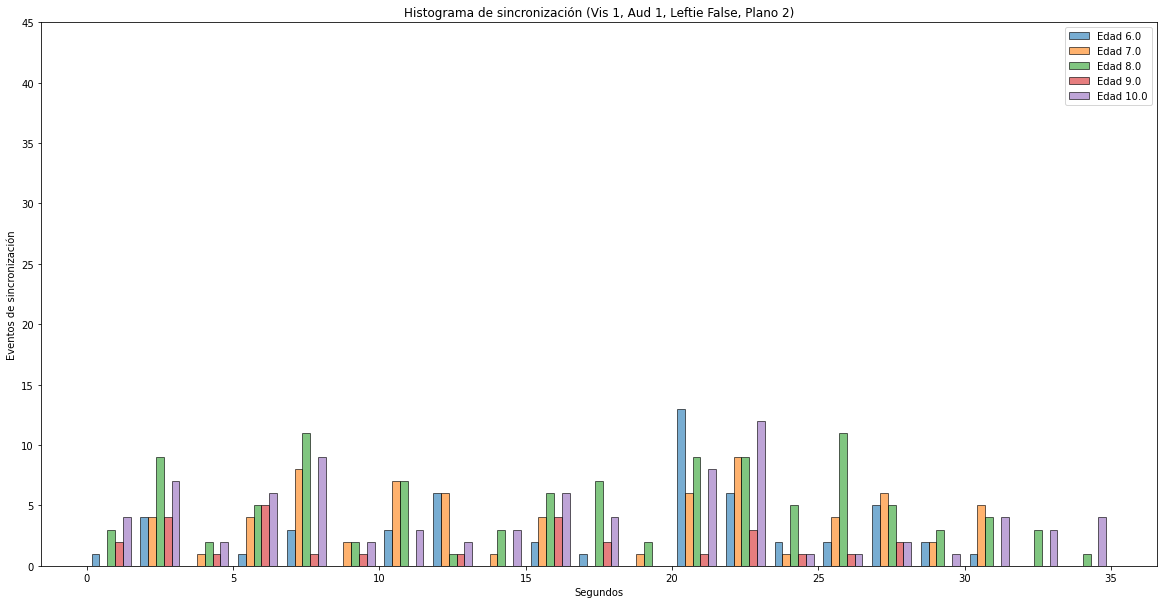

In [265]:
fig, ax1 = plt.subplots(figsize=(20, 10))
bineado = np.linspace(0, 35, 22)
unique_edades = np.unique(edades_peces)

# Crear estructura para apilado
hist_data = []
for edad in unique_edades:
    hist_data.append(momentos_sincronia[edades_peces == edad])

# Graficar el histograma apilado
n, bins, patches = ax1.hist(hist_data, bins=bineado, stacked=False, label=[f'Edad {e}' for e in unique_edades], edgecolor="black", alpha=0.6)
ax1.set_xlabel('Segundos')
ax1.set_ylabel('Eventos de sincronización')
ax1.set_title(f'Histograma de sincronización (Vis {vis_con}, Aud {aud_con}, Leftie {leftie}, Plano {planos})')
ax1.set_ylim(0, 45)
ax1.legend()
                

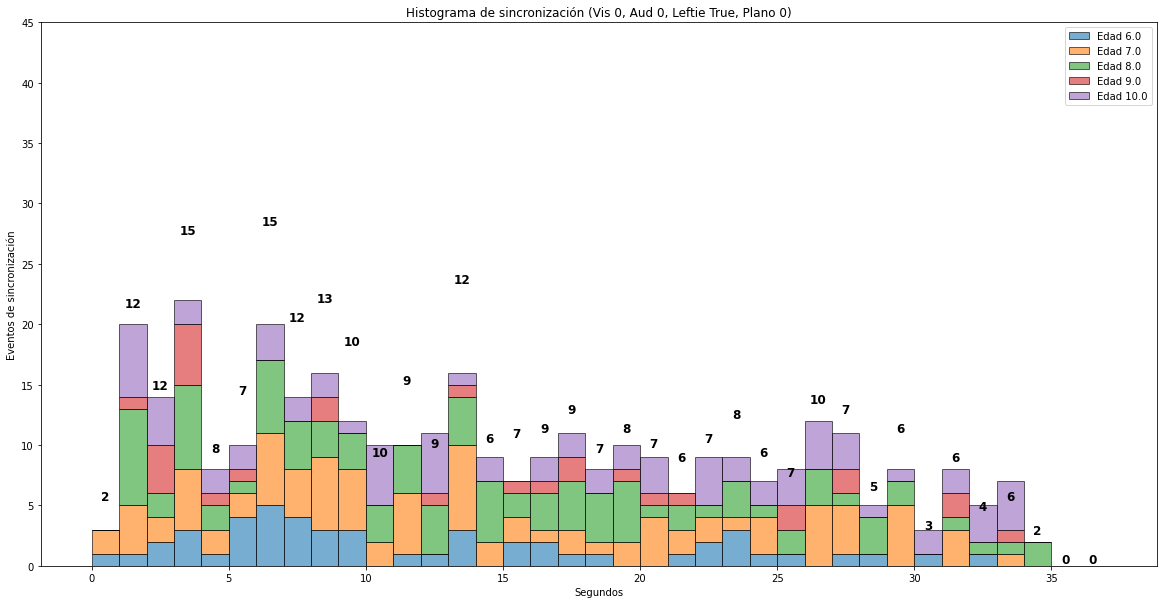

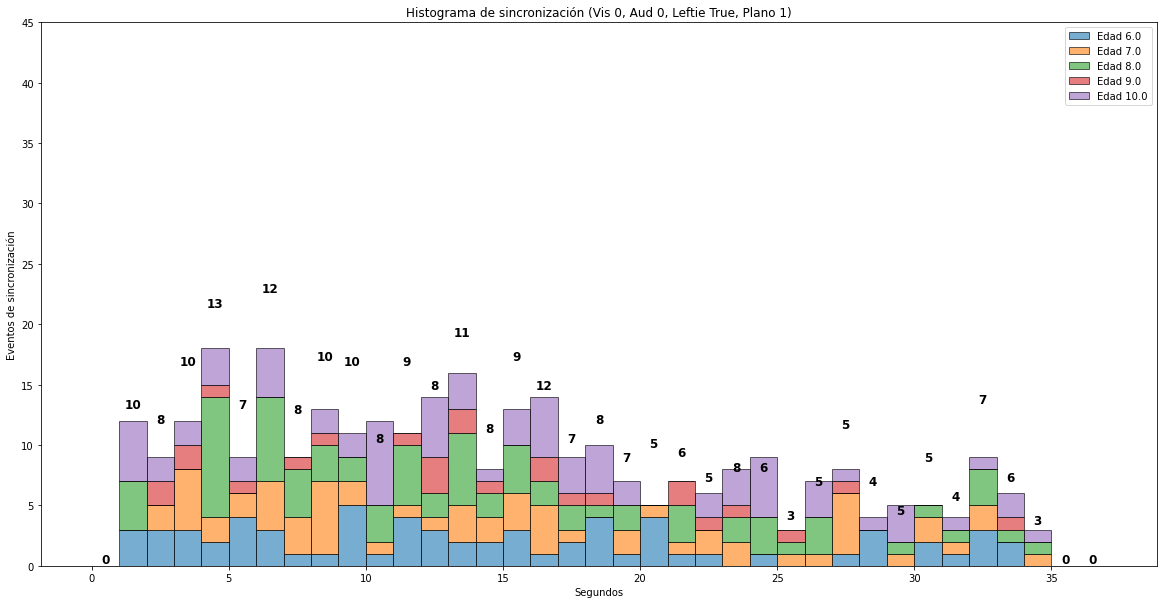

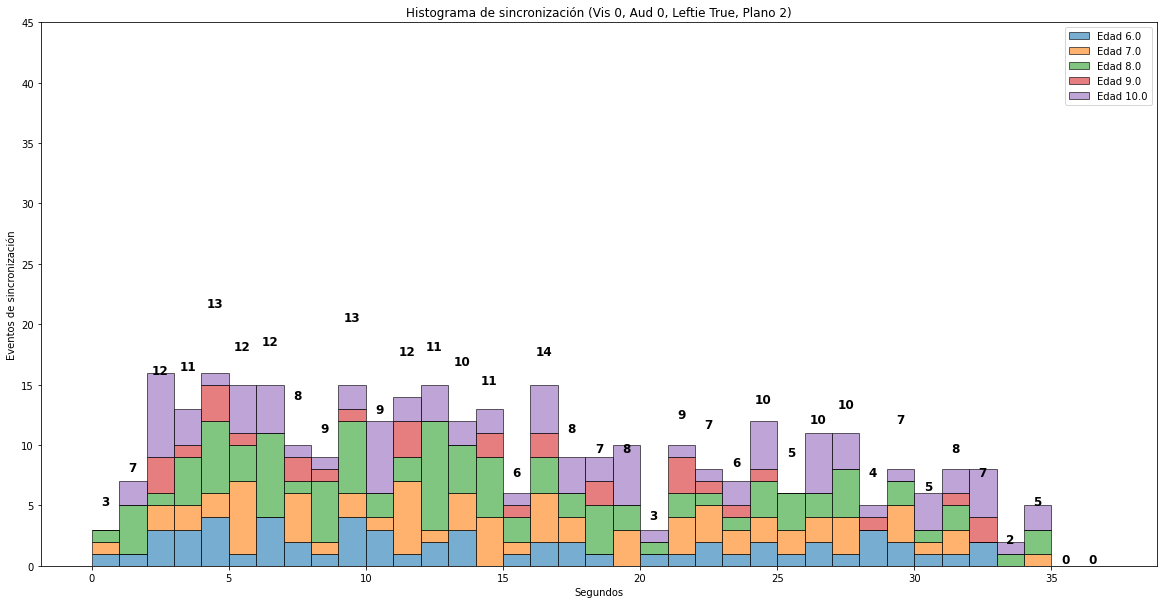

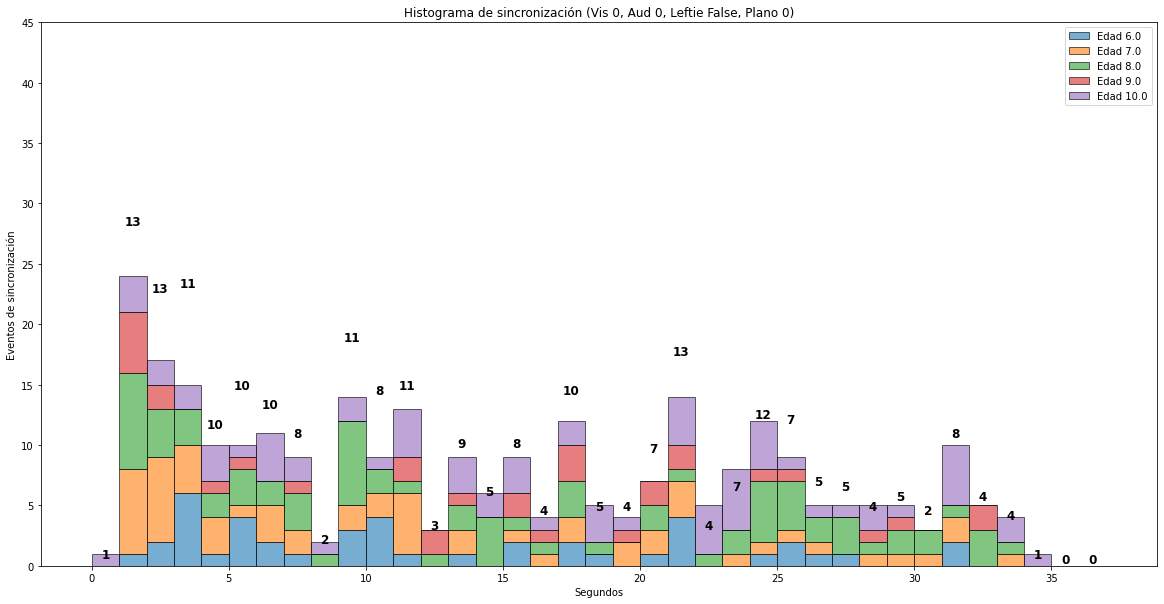

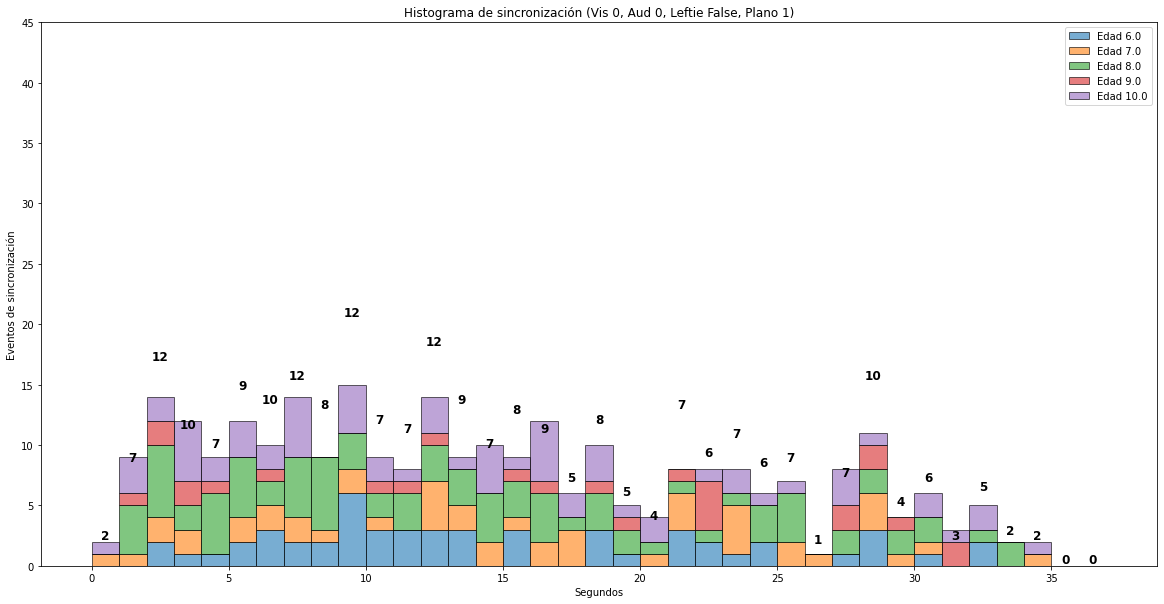

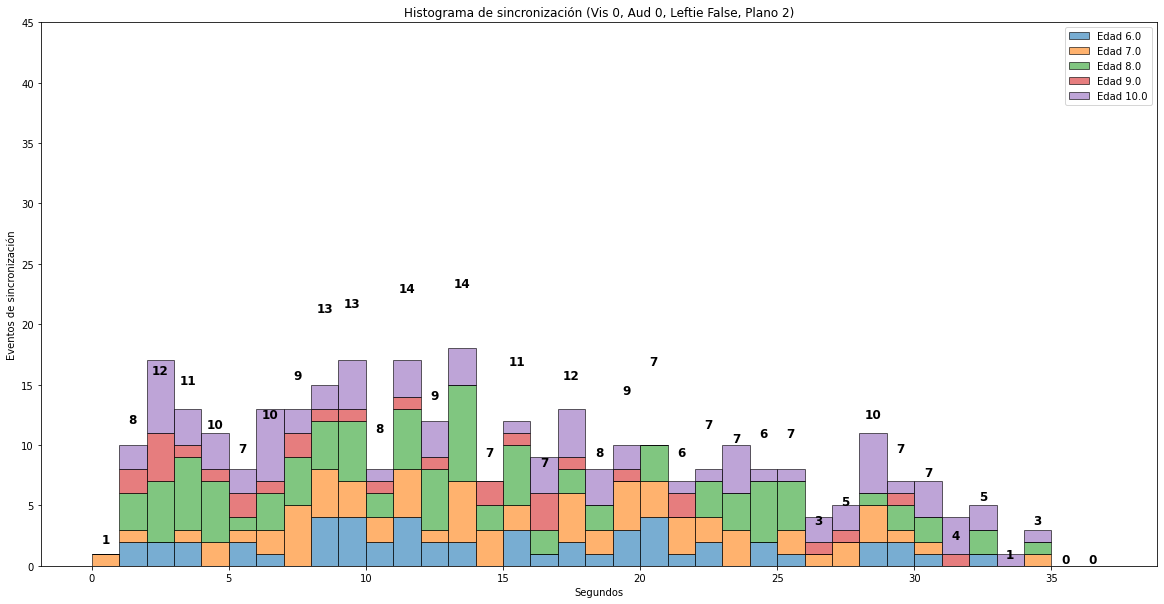

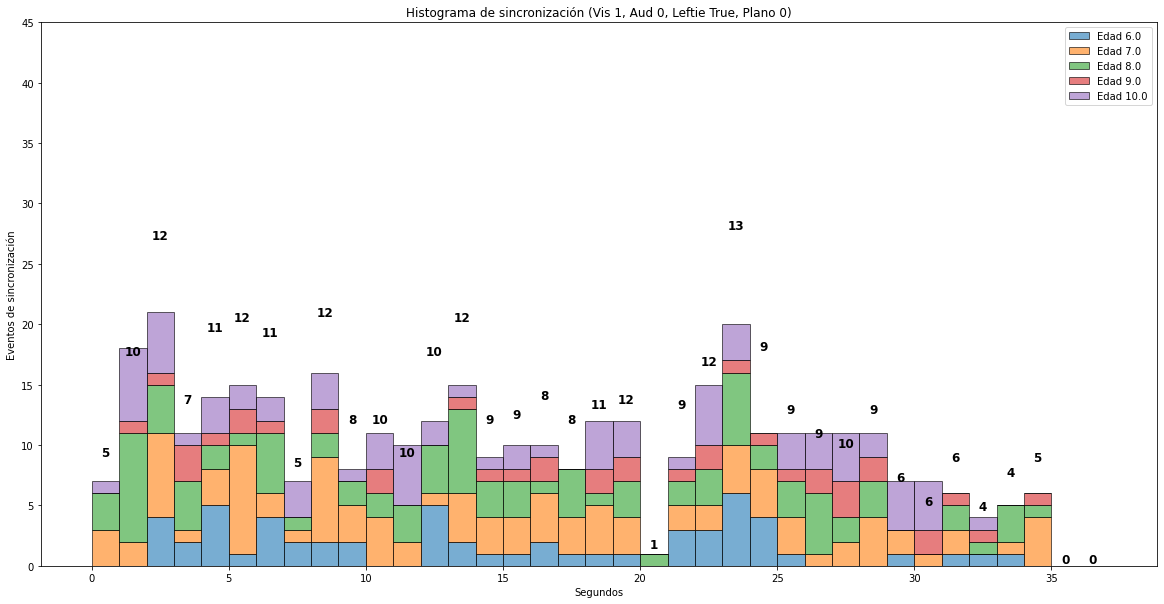

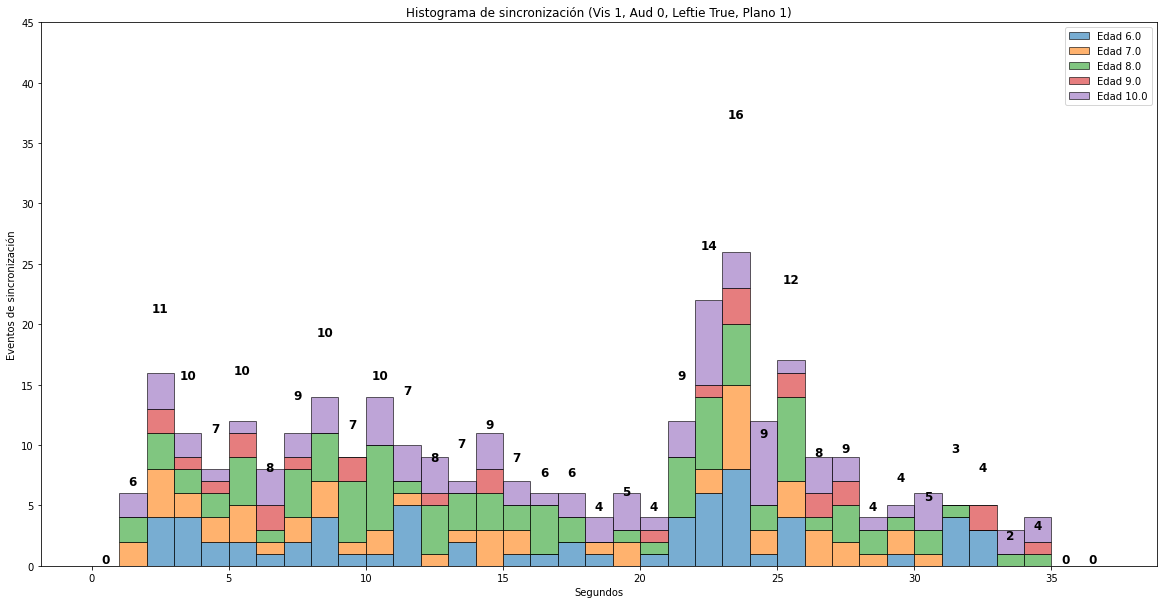

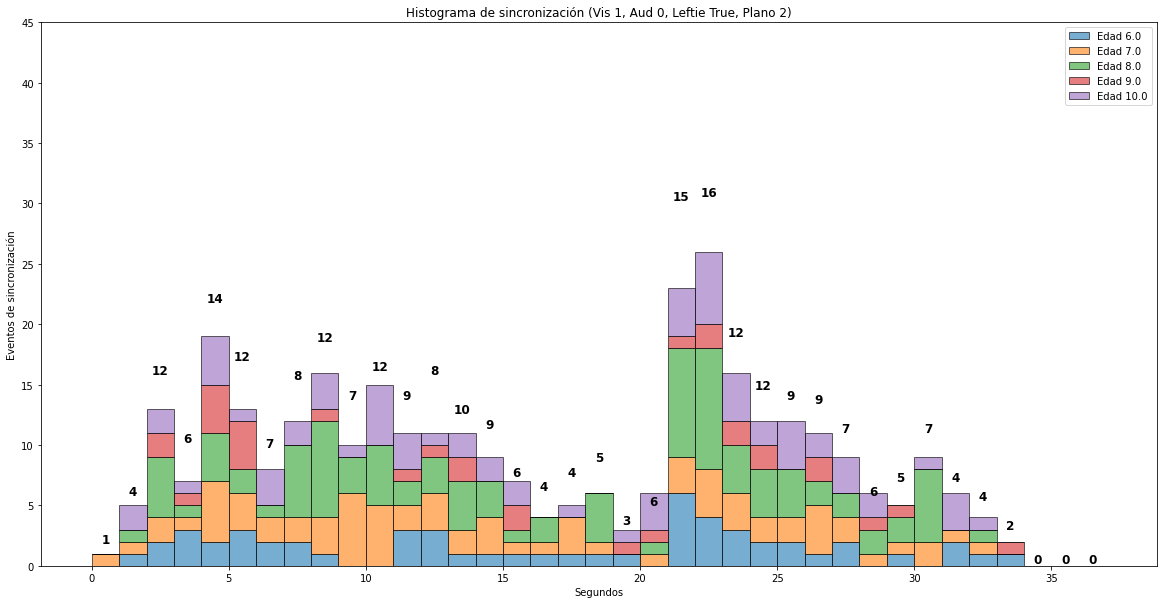

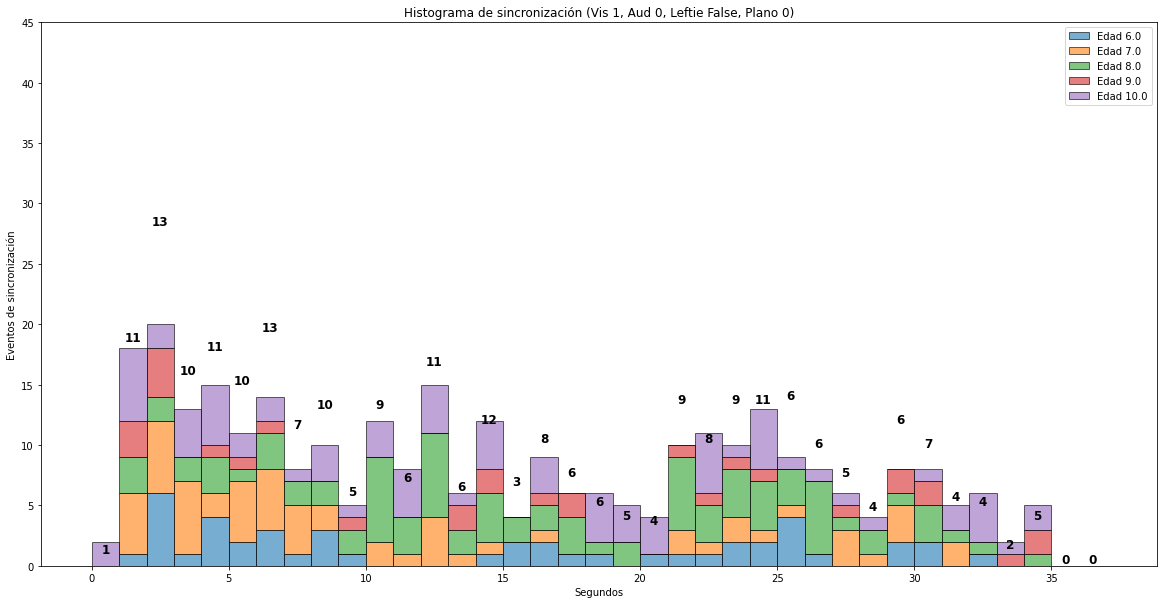

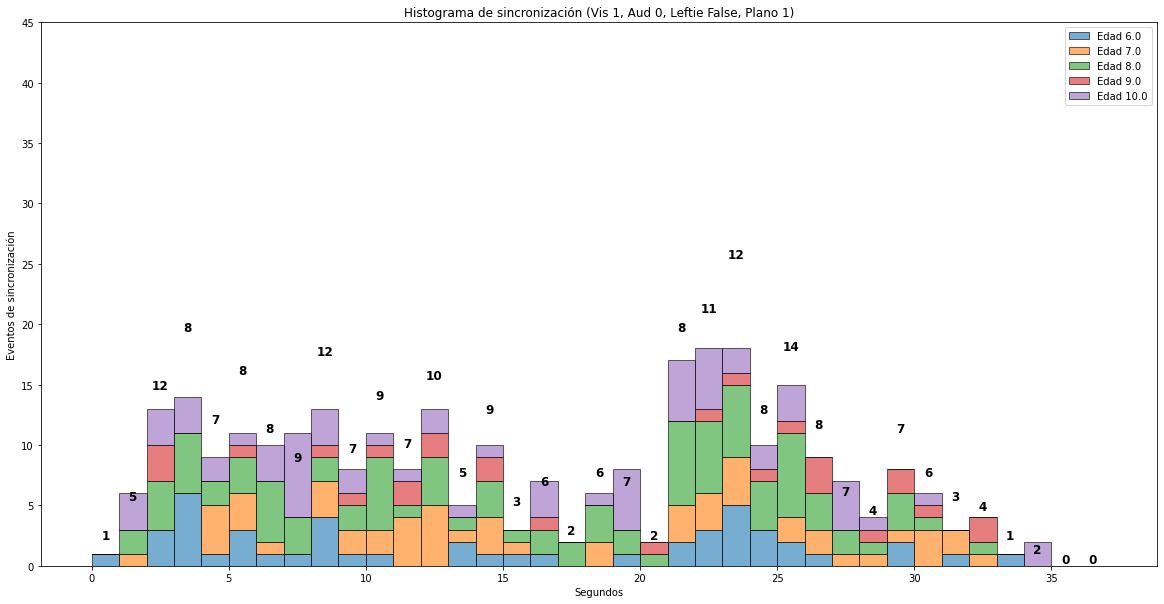

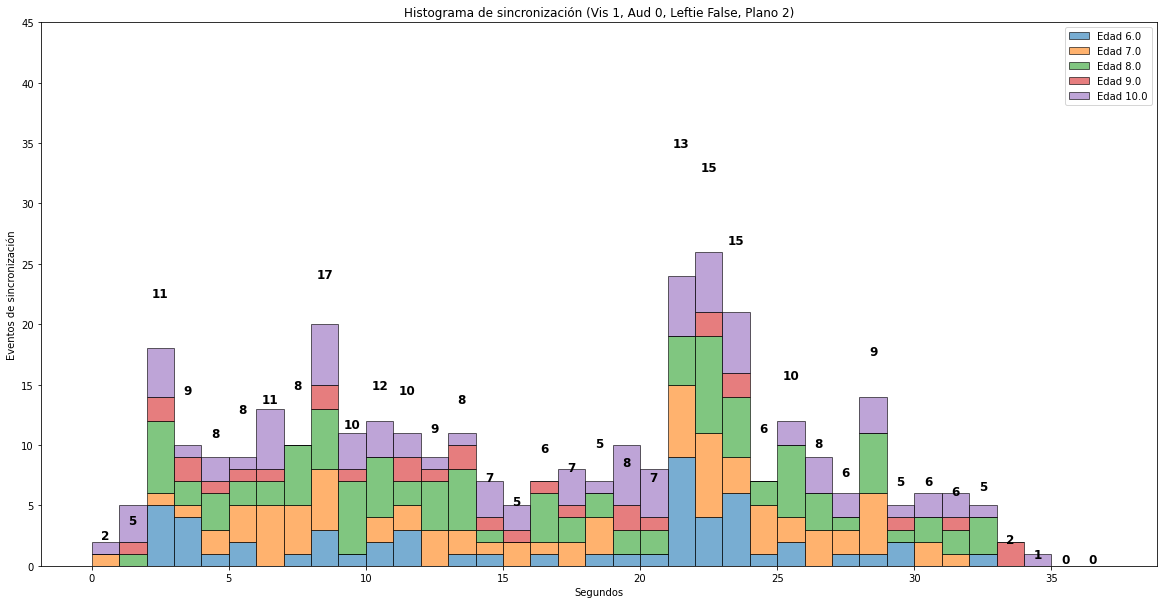

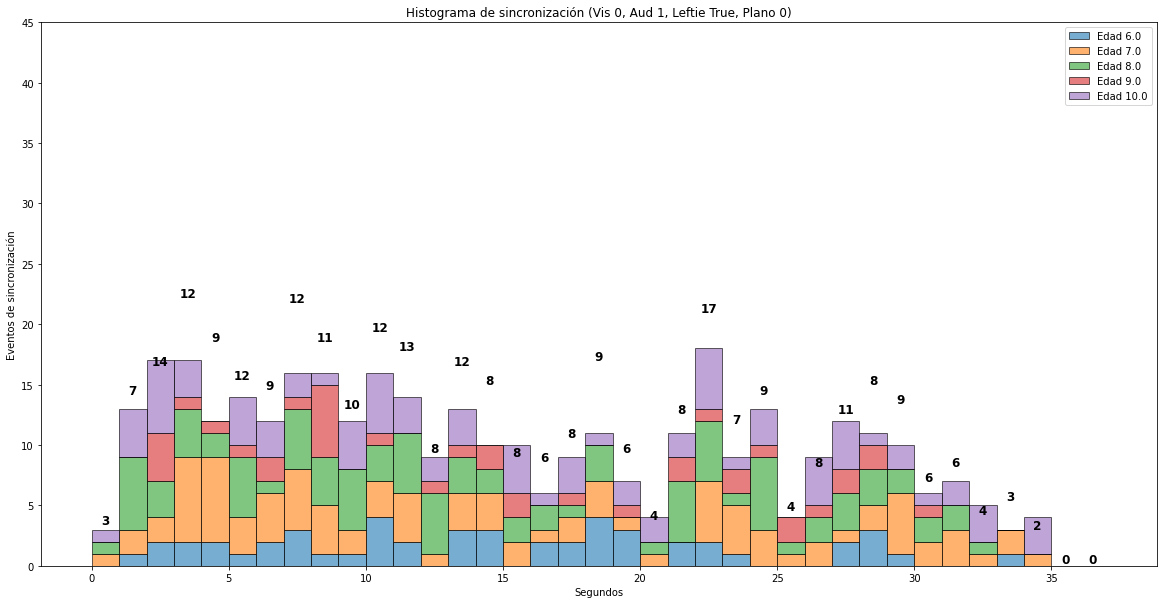

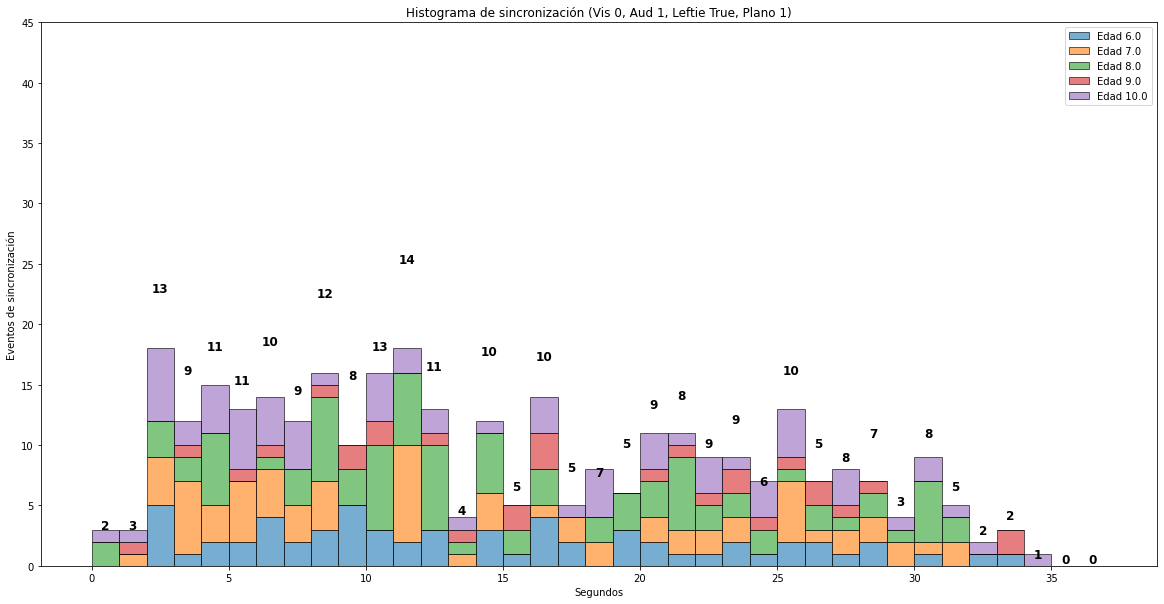

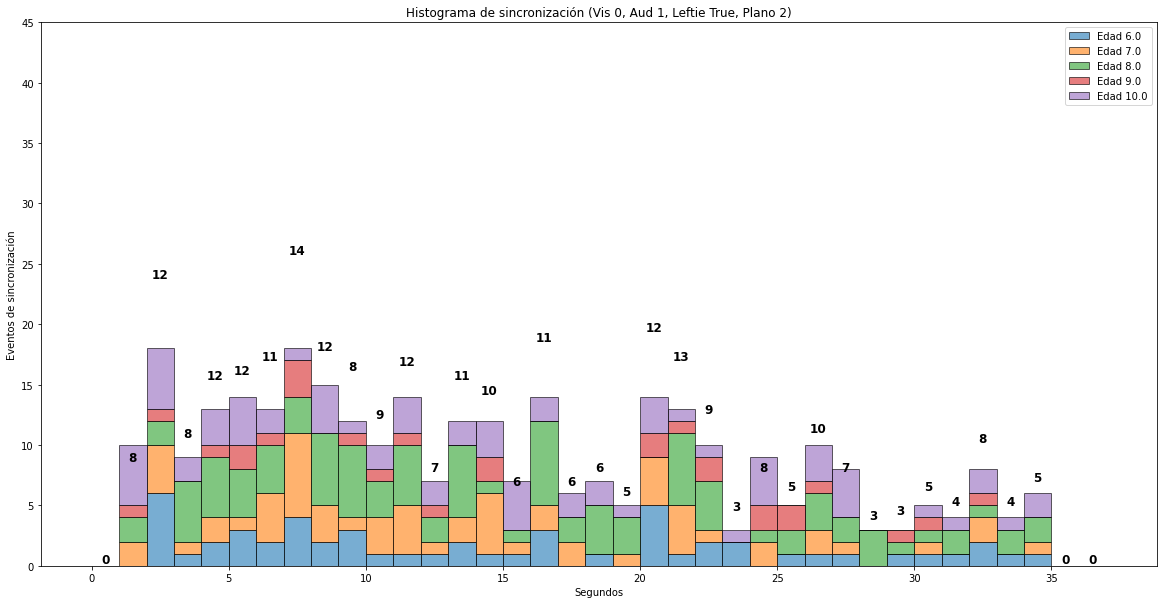

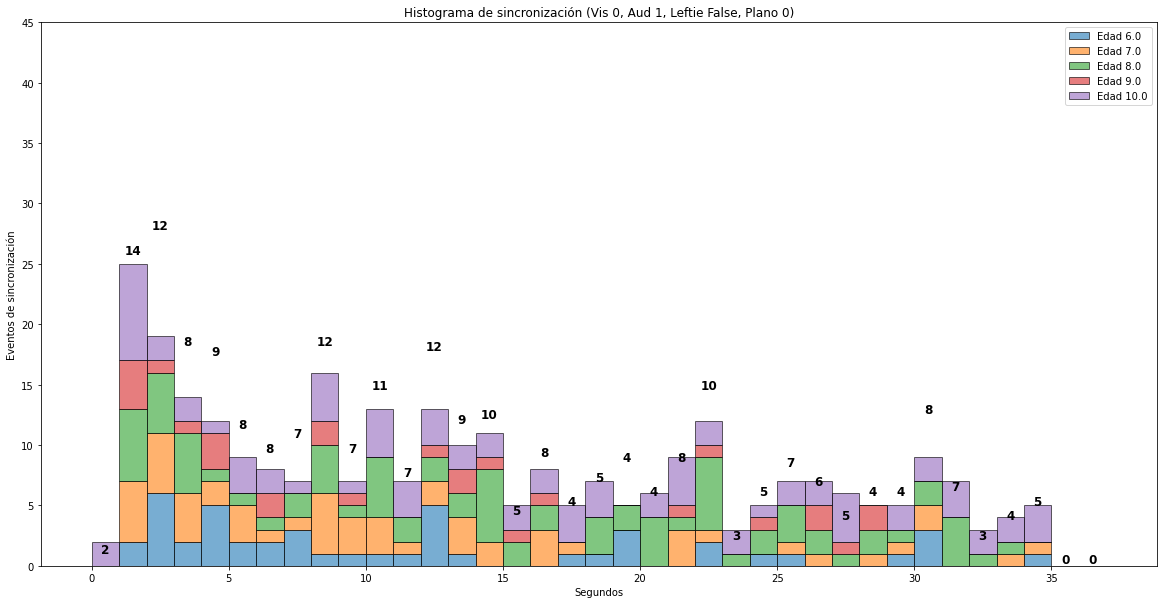

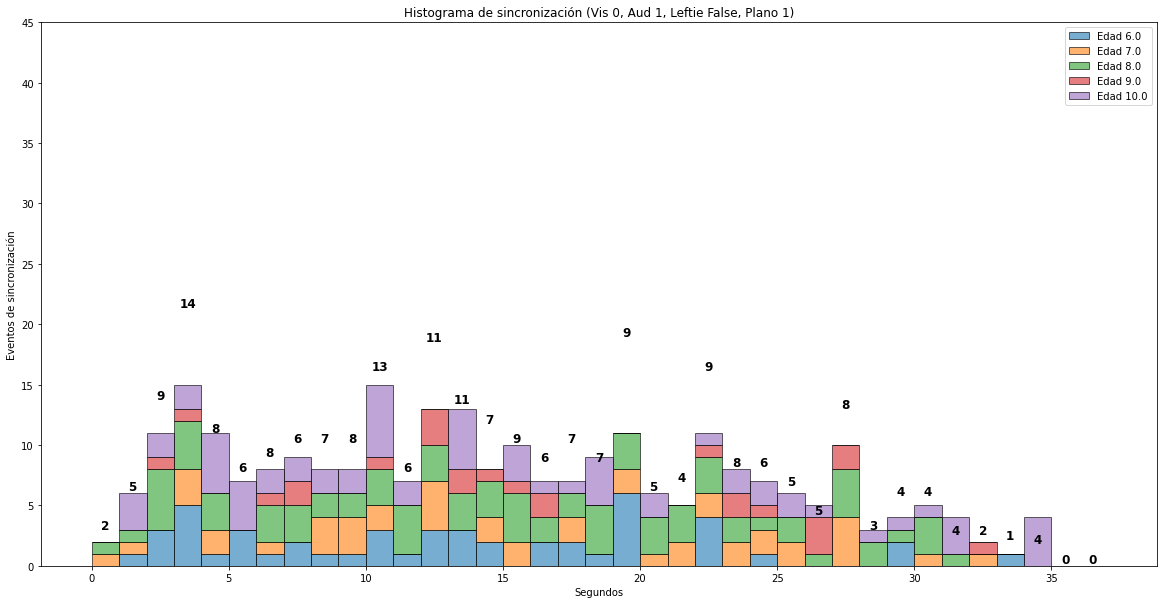

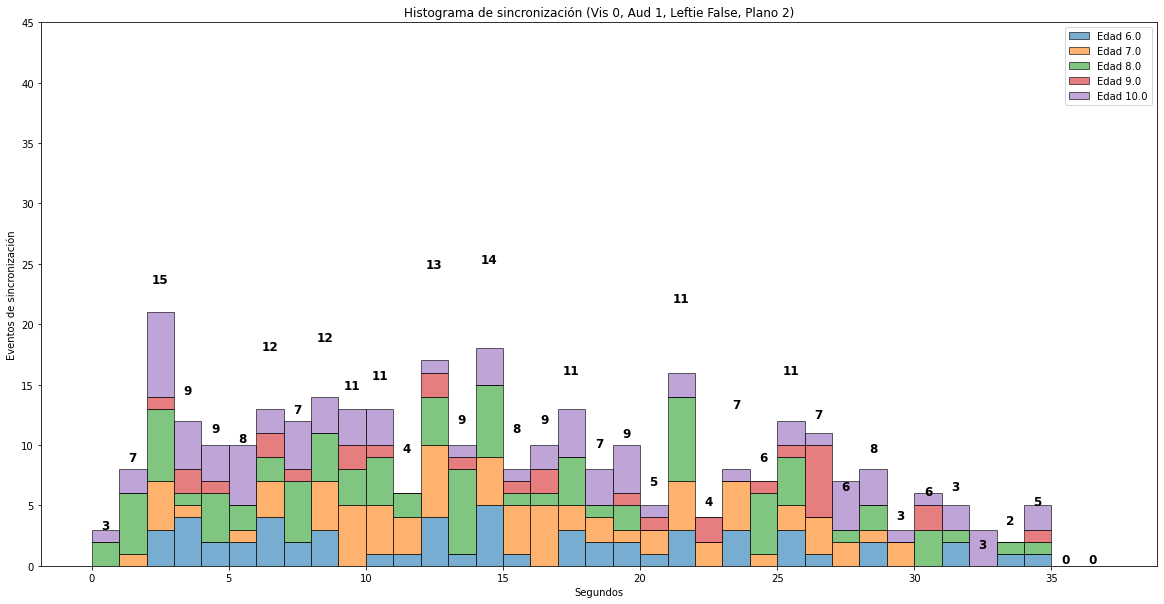

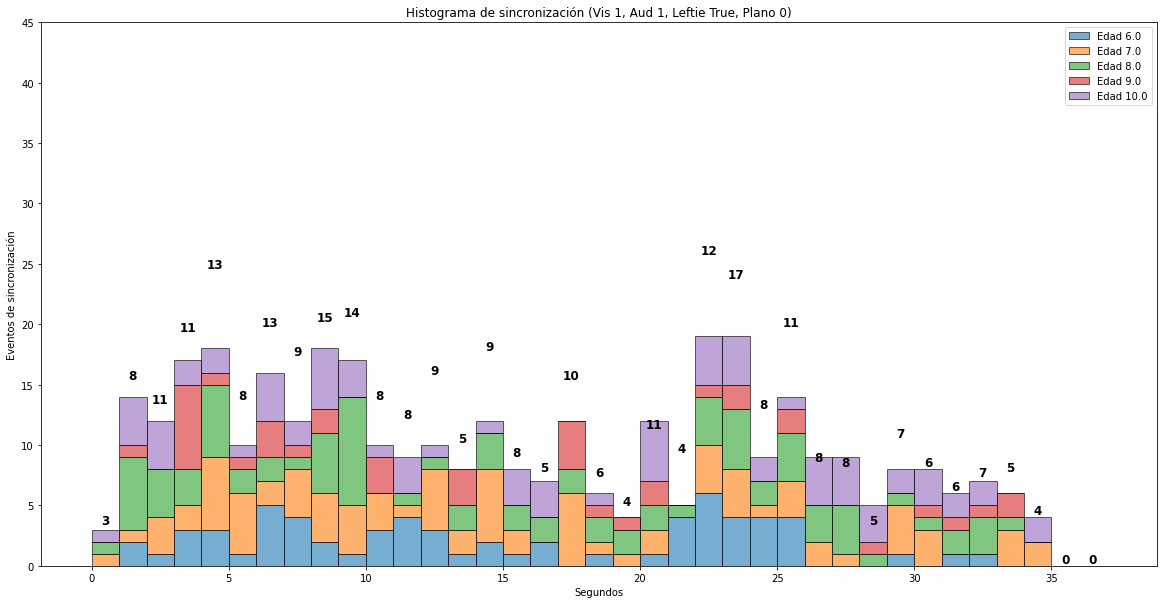

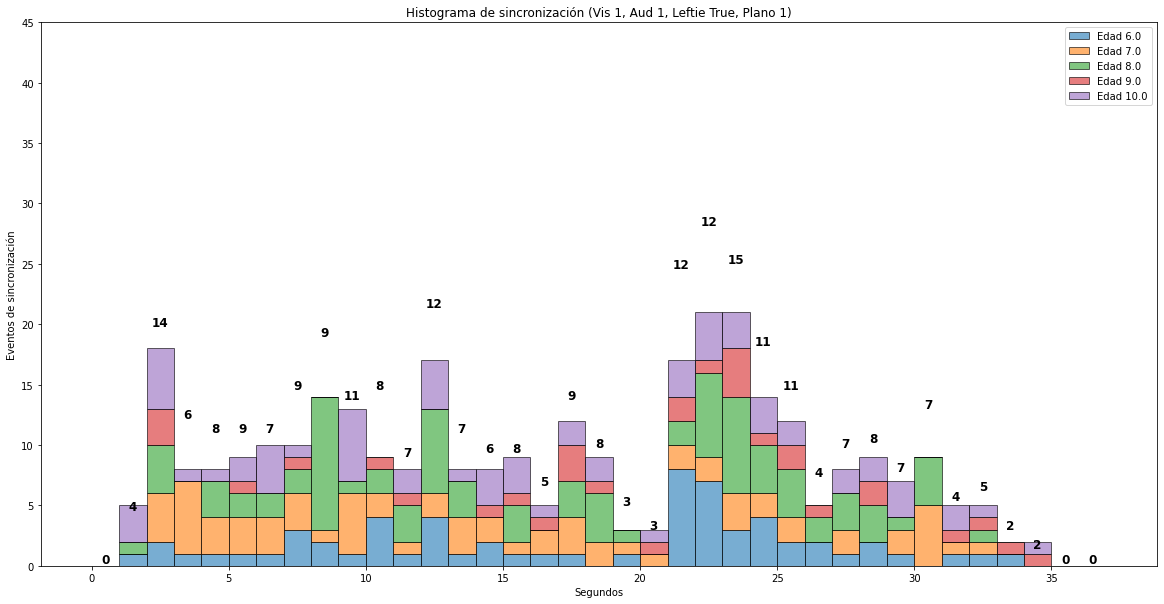

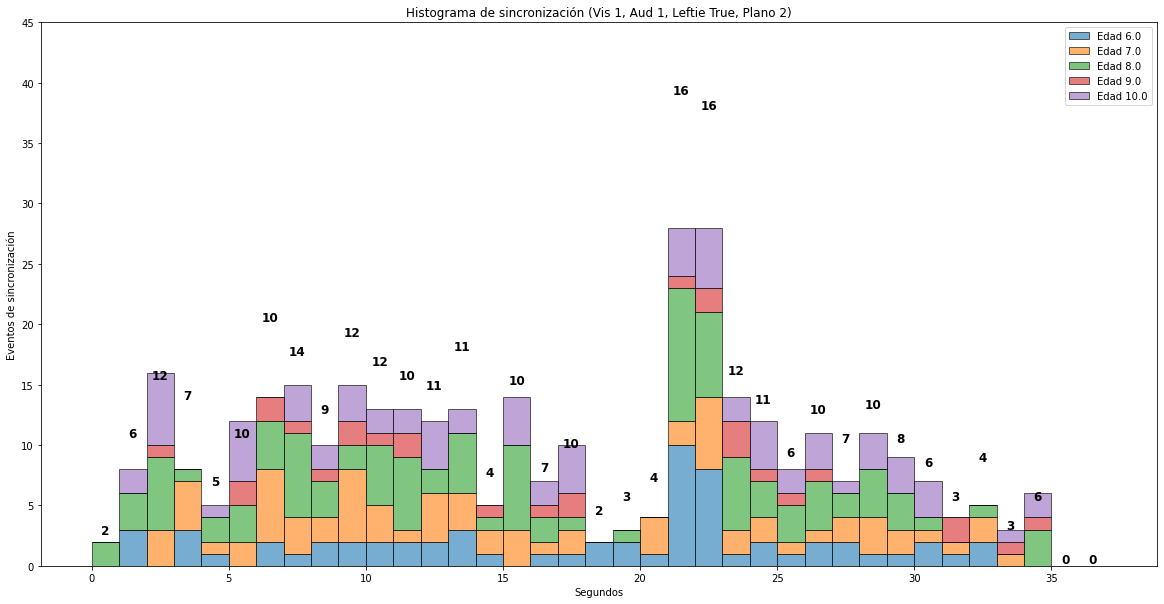

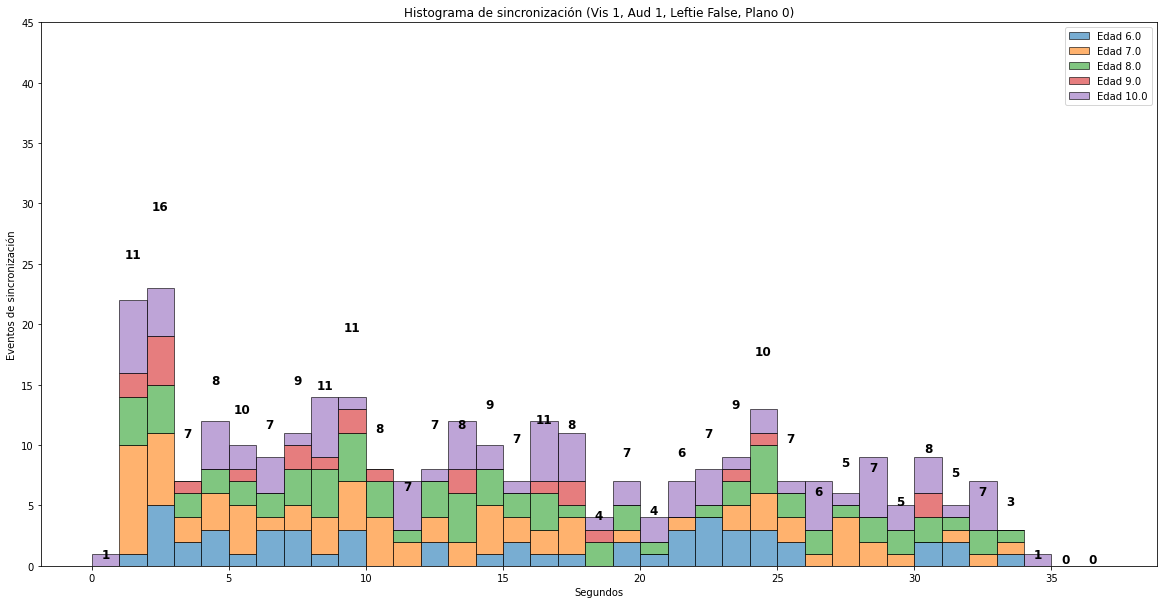

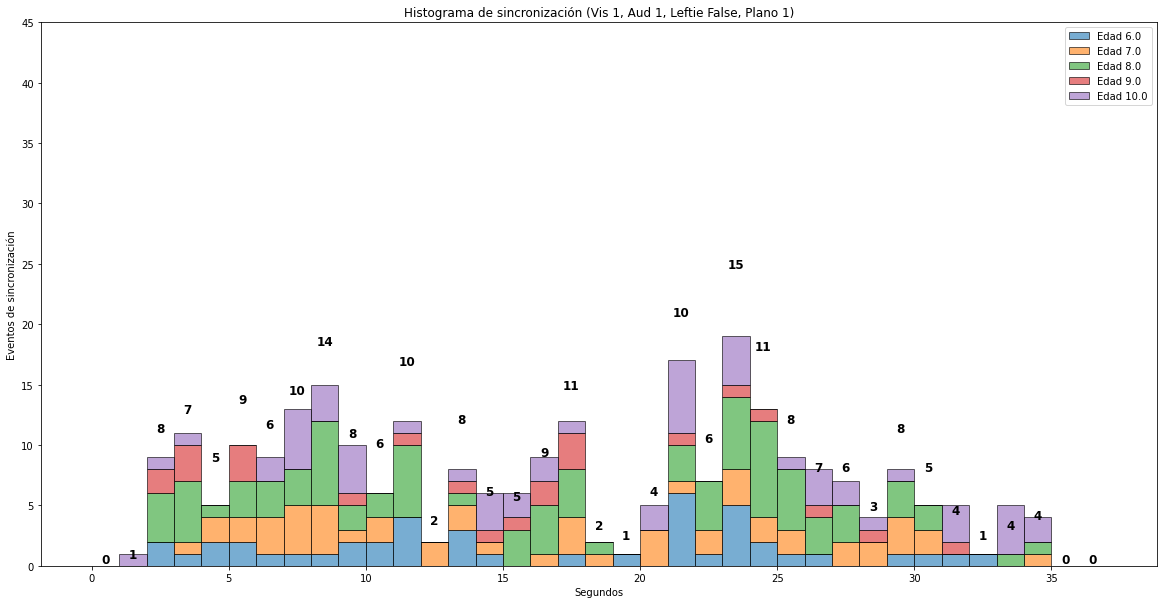

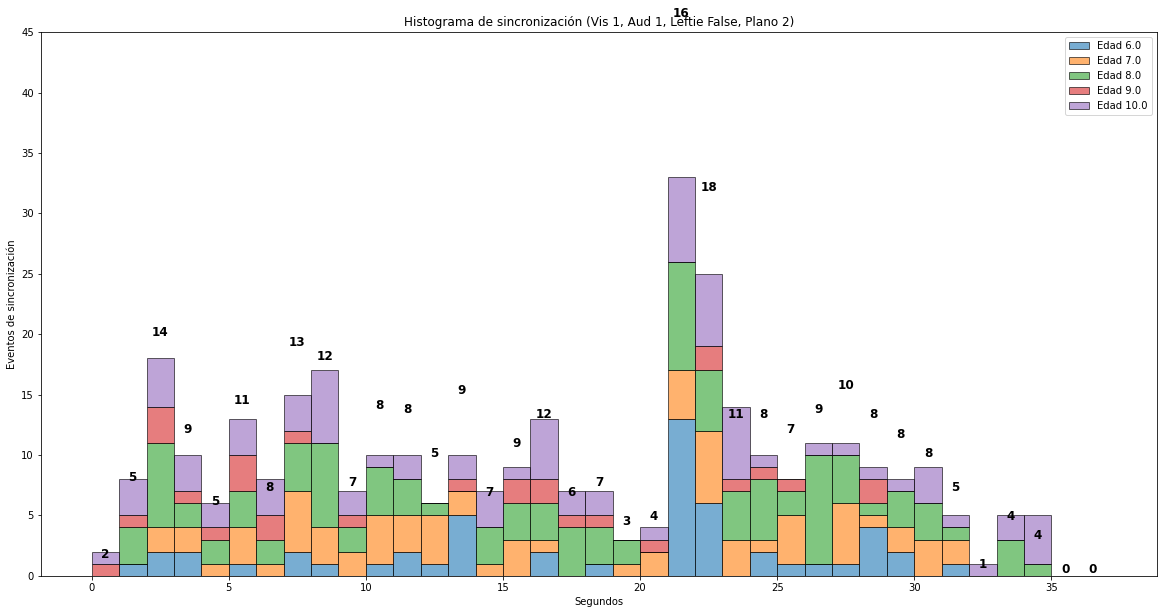

In [273]:
# Iterar sobre combinaciones de condiciones
for aud_con in [0,1]:
    for vis_con in [0,1]:
        for leftie in [True, False]:
            for planos in ['0', '1', '2']:
                momentos_sincronia = []
                edades_peces = []
                areas_por_bin = []
                
                for key in areas:
                    if '52' not in key:
                        for j in range(len(areas[key].trials)):
                            if  areas[key].trials[j].vis == vis_con and areas[key].trials[j].aud == aud_con and key[-1] == planos:
                                
                                data_array = areas[key].trials[j].roi_dffs["Hb"][areas[key].roi_lefties['Hb'] == leftie]
                                edad = areas[key].trials[j].data['Edad']
                                
                                # Encontrar el primer evento (máximo) en cada fila
                                first_event_indices = np.argmax(data_array, axis=1)
                                sorted_indices = np.argsort(first_event_indices)
                                sorted_data_array = data_array[sorted_indices]
                                
                                # Normalización
                                data_z = sorted_data_array - np.expand_dims(np.mean(sorted_data_array, axis=1), axis=1)
                                data_z = data_z / np.expand_dims(np.std(sorted_data_array, axis=1), axis=1)
                                
                                # Promedio
                                promedio_data_z = data_z.mean(axis=0)
                                mascara_th = promedio_data_z > 0.4
                                start_indices = np.where((mascara_th[:-1] == False) & (mascara_th[1:] == True))[0] + 1
                                if mascara_th[0] == True:
                                    start_indices = np.insert(start_indices, 0, 0)
                                
                                # Guardar eventos con su respectiva área y edad
                                for event in start_indices:
                                    momentos_sincronia.append(event)
                                    edades_peces.append(edad)
                                    areas_por_bin.append(key)
                
                # Convertir a array para análisis
                momentos_sincronia = np.array(momentos_sincronia)
                edades_peces = np.array(edades_peces)
                areas_por_bin = np.array(areas_por_bin)
                
                # Crear histogramas apilados por edad
                fig, ax1 = plt.subplots(figsize=(20, 10))
                bineado = np.linspace(0, 37, 38)
                unique_edades = np.unique(edades_peces)
                
                # Crear estructura para apilado
                hist_data = []
                for edad in unique_edades:
                    hist_data.append(momentos_sincronia[edades_peces == edad])
                
                # Graficar el histograma apilado
                n, bins, patches = ax1.hist(hist_data, bins=bineado, stacked=True, label=[f'Edad {e}' for e in unique_edades], edgecolor="black", alpha=0.6)
                ax1.set_xlabel('Segundos')
                ax1.set_ylabel('Eventos de sincronización')
                ax1.set_title(f'Histograma de sincronización (Vis {vis_con}, Aud {aud_con}, Leftie {leftie}, Plano {planos})')
                ax1.set_ylim(0, 45)
                ax1.legend()
                
                # Contar cuántas áreas distintas participan en cada bin
                areas_distintas_por_bin = []
                for i in range(len(bins) - 1):
                    indices_bin = (momentos_sincronia >= bins[i]) & (momentos_sincronia < bins[i+1])
                    areas_en_bin = np.unique(areas_por_bin[indices_bin])
                    areas_distintas_por_bin.append(len(areas_en_bin))
                    
                    # Agregar el número de áreas contribuyentes justo sobre la barra del histograma
                    ax1.text((bins[i] + bins[i+1]) / 2, np.mean(n[:, i])*2, str(areas_distintas_por_bin[-1]), 
                             ha='center', va='bottom', fontsize=12, fontweight='bold')
                    # ax1.text((bins[i] + bins[i+1]) / 2, n[i], str(areas_distintas_por_bin[-1]), 
                    #          ha='center', va='bottom', fontsize=12, fontweight='bold')
                
                # Guardar el histograma generado
                title, title_s = generate_title(aud_con, vis_con, leftie, planos)
                plt.show()

    Bin Start  Bin End  Eventos de Sincronización  \
0        1.00     2.65                       10.0   
1        2.65     4.30                       16.0   
2        4.30     5.95                       10.0   
3        5.95     7.60                       22.0   
4        7.60     9.25                       25.0   
5        9.25    10.90                        6.0   
6       10.90    12.55                       14.0   
7       12.55    14.20                       14.0   
8       14.20    15.85                        6.0   
9       15.85    17.50                       21.0   
10      17.50    19.15                        3.0   
11      19.15    20.80                        5.0   
12      20.80    22.45                       24.0   
13      22.45    24.10                       32.0   
14      24.10    25.75                        9.0   
15      25.75    27.40                       15.0   
16      27.40    29.05                       12.0   
17      29.05    30.70                        

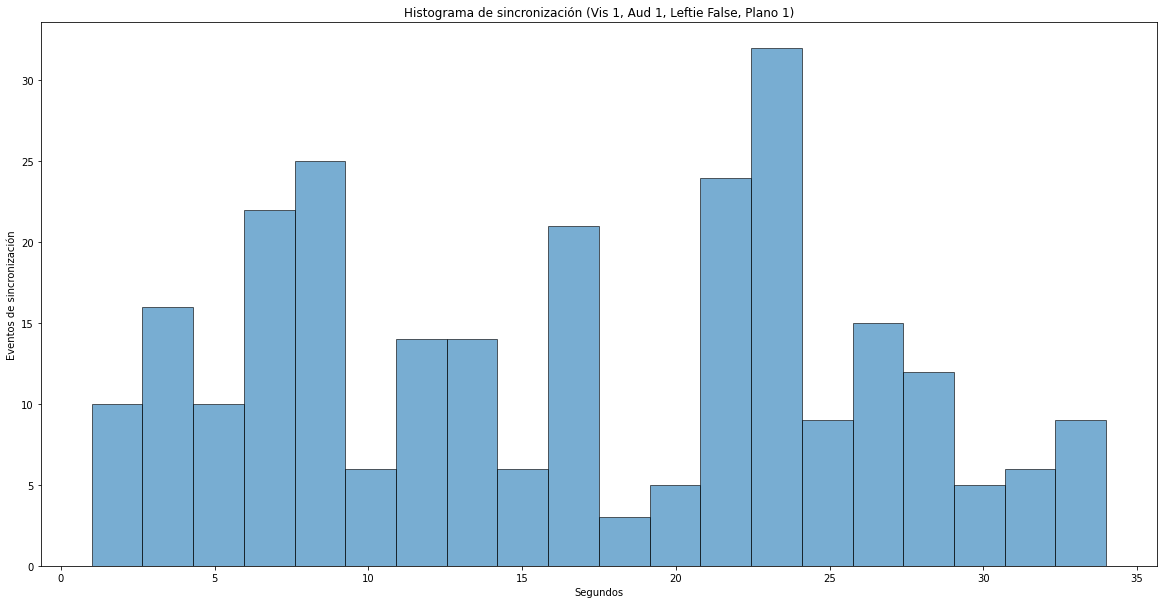

In [193]:
# Lista para almacenar eventos de sincronización y sus áreas
momentos_sincronia = []
areas_por_bin = []

# Iterar sobre las áreas y trials
for key in areas:
    if '52' not in key:
        for j in range(len(areas[key].trials)):
            if  areas[key].trials[j].vis == vis_con and areas[key].trials[j].aud == aud_con and key[-1] == planos:
                
                data_array = areas[key].trials[j].roi_dffs["Hb"][areas[key].roi_lefties['Hb'] == leftie]
                
                # Encontrar el primer evento (máximo) en cada fila
                first_event_indices = np.argmax(data_array, axis=1)
                sorted_indices = np.argsort(first_event_indices)
                sorted_data_array = data_array[sorted_indices]
                
                # Normalización
                data_z = sorted_data_array - np.expand_dims(np.mean(sorted_data_array, axis=1), axis=1)
                data_z = data_z / np.expand_dims(np.std(sorted_data_array, axis=1), axis=1)
                
                # Promedio
                promedio_data_z = data_z.mean(axis=0)
                mascara_th = promedio_data_z > 0.4
                start_indices = np.where((mascara_th[:-1] == False) & (mascara_th[1:] == True))[0] + 1
                if mascara_th[0] == True:
                    start_indices = np.insert(start_indices, 0, 0)
                
                # Guardar eventos con su respectiva área
                for event in start_indices:
                    momentos_sincronia.append(event)
                    areas_por_bin.append(key)

# Convertir a array para análisis
momentos_sincronia = np.array(momentos_sincronia)
areas_por_bin = np.array(areas_por_bin)

# Crear histogramas
fig, ax1 = plt.subplots(figsize=(20, 10))
n, bins, _ = ax1.hist(momentos_sincronia, bins=20, edgecolor="black", alpha=0.6)
ax1.set_xlabel('Segundos')
ax1.set_ylabel('Eventos de sincronización')
ax1.set_title(f'Histograma de sincronización (Vis {vis_con}, Aud {aud_con}, Leftie {leftie}, Plano {planos})')

# Contar cuántas áreas distintas participan en cada bin
areas_distintas_por_bin = []
for i in range(len(bins) - 1):
    indices_bin = (momentos_sincronia >= bins[i]) & (momentos_sincronia < bins[i+1])
    areas_en_bin = np.unique(areas_por_bin[indices_bin])
    areas_distintas_por_bin.append(len(areas_en_bin))

# Crear DataFrame con la información de áreas por bin
df_areas_bin = pd.DataFrame({
    "Bin Start": bins[:-1],
    "Bin End": bins[1:],
    "Eventos de Sincronización": n,
    "Áreas Distintas Contribuyentes": areas_distintas_por_bin
})

# Mostrar tabla con la información
print(df_areas_bin)

In [174]:
def generate_title(aud_con, vis_con, leftie, planos):
    # Determinar el tipo de trials
    if aud_con == 1 and vis_con == 0:
        trial_type = "Auditory Trials"
    elif aud_con == 0 and vis_con == 1:
        trial_type = "Visual Trials"
    elif aud_con == 1 and vis_con == 1:
        trial_type = "Multisensory Trials"
    else:
        trial_type = "No Sensory Stimulus"
    
    # Determinar el lado
    side = "Right Side" if leftie else "Left Side"
    
    # Determinar la altura de los planos
    plane_height = f"Plane Height: {planos}"
    
    # Combinar todo en un título
    title = f"{trial_type} | {side} | {plane_height}"
    title_s = f"{trial_type} {side} {plane_height.split(':')[0]} {plane_height.split(':')[1]}"
    return title, title_s

title,title_s = generate_title(aud_con, vis_con, leftie, planos)
print(title_s)


No Sensory Stimulus Left Side Plane Height  0


In [176]:
os.chdir(r'C:\Users\PC\Desktop\Analisis conf\Graficos 11-2024')

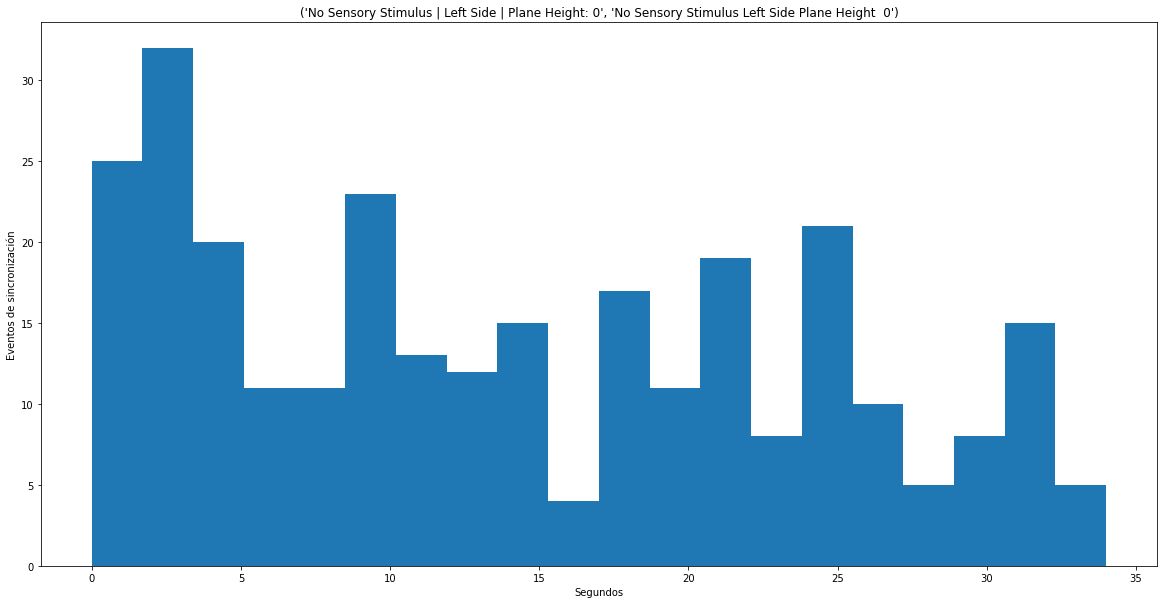

In [ ]:

plt.figure(figsize=(20,10),facecolor='white')
title,title_s = generate_title(aud_con, vis_con, leftie, planos)
plt.title(title)
plt.hist(np.array(momentos_sincronia), bins=20)
plt.xlabel('Segundos')
plt.ylabel('Eventos de sincronización')
plt.savefig(title_s)
plt.show()
# plt.figure()
# plt.plot(momentos_sincronia, '.')
# plt.xlim(130,170)

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.cluster.hierarchy import linkage, leaves_list
# from scipy.ndimage import gaussian_filter1d

# for key in areas:
#     for j in range(len(areas[key].trials)):
#         # if areas[key].trials[j].vis == 0 and areas[key].trials[j].aud == 1:
#             # Convertir la lista de listas a un array de numpy para manipularlo fácilmente
#             data_array = areas[key].trials[j].roi_dffs["Hb"][areas[key].roi_lefties['Hb'] == False]

#             # Realizar clustering jerárquico para encontrar la similitud entre filas
#             Z = linkage(data_array, method='centroid')
#             row_order = leaves_list(Z)

#             # Reordenar las filas del array de datos según el orden calculado
#             sorted_data_array = data_array[row_order, :]

#             # Encontrar el primer evento (máximo) en cada fila
#             first_event_indices = np.argmax(data_array, axis=1)

#             # Ordenar las filas según el índice del primer evento
#             sorted_indices = np.argsort(first_event_indices)
#             sorted_data_array = data_array[sorted_indices]

#             # Normalizar los datos
#             data_z = sorted_data_array - np.expand_dims(np.mean(sorted_data_array, axis=1), axis=1)
#             data_z = data_z / np.expand_dims(np.std(data_z, axis=1), axis=1)

#             # Promediar los datos y aplicar filtro gaussiano
#             promedio_data_z = data_z.mean(axis=0)
#             promedio_filtrado = gaussian_filter1d(promedio_data_z, 3)
#             mascara_th = promedio_filtrado > 0.4
#             indices_mascara = np.where(mascara_th)

#             # Encontrar los índices de inicio de los momentos de sincronía
#             start_indices = np.where((mascara_th[:-1] == False) & (mascara_th[1:] == True))[0] + 1
#             if mascara_th[0] == True:
#                 start_indices = np.insert(start_indices, 0, 0)

#             # Almacenar momentos de sincronía
#             momentos_sincronia = start_indices

#             # Plotear las unidades que participan en los momentos de sincronía
#             for momento in momentos_sincronia:
#                 # Identificar unidades activas en este momento
#                 unidades_activas = np.where(sorted_data_array[:, momento] > 0)[0]

#                 # Generar gráfico
#                 plt.figure(figsize=(10, 6))
#                 plt.imshow(sorted_data_array, aspect='auto', cmap='viridis')
#                 plt.colorbar(label='Actividad (z-score)')
#                 plt.scatter([momento] * len(unidades_activas), unidades_activas, color='red', label='Unidades activas')
#                 plt.title(f'Momento de sincronía en el trial {j}, área {key}, en el tiempo {momento}')
#                 plt.xlabel('Tiempo')
#                 plt.ylabel('Unidades')
#                 plt.legend()
#                 plt.show()


In [80]:
areas[key].trials[j].roi_dffs["Hb"]

array([[ 0.64502558, -0.84704269, -0.66846749, ..., -0.69254614,
        -0.78618372, -0.52326965],
       [-1.64699292, -0.55881705,  0.4096631 , ...,  0.05125748,
        -0.334621  , -0.49392709],
       [ 0.27359031, -1.32940607,  0.07148365, ...,  0.56613995,
         0.64454428,  0.25628483],
       ...,
       [ 0.03104014,  0.24334264, -0.05719266, ...,  0.5361935 ,
        -0.23324357, -0.05058437],
       [-2.66215879,  1.45799176,  5.52534887, ...,  3.75236689,
        -0.1177376 , -0.57754577],
       [-3.10805037,  0.63745739,  3.07969862, ...,  1.0648336 ,
        -2.00672641, -3.14208346]])

In [95]:
areas[key].roi_lefties['Hb']

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True, False, False,
        True,  True,  True,  True,  True,  True, False, False,  True,
       False,  True,  True, False,  True, False,  True, False,  True,
        True, False,  True,  True, False, False,  True, False,  True,
        True, False,  True,  True, False,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

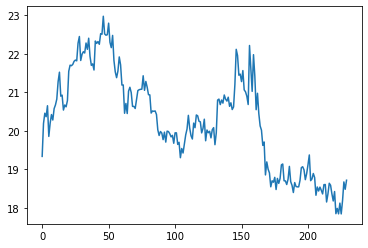

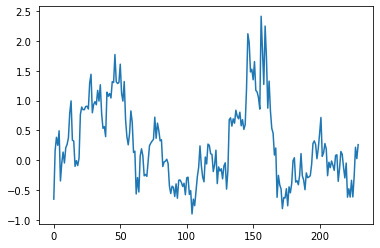

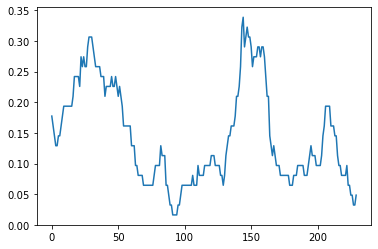

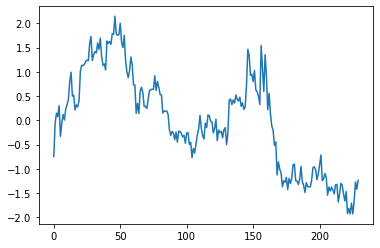

In [51]:
plt.plot(areas["1-1"].trials[1].roi_activities["Hb"].mean(axis=0))
plt.show()
plt.plot(areas["1-1"].trials[1].roi_dffs["Hb"].mean(axis=0))
plt.show()
plt.plot(areas["1-1"].trials[1].roi_binaries["Hb"].mean(axis=0))
plt.show()


In [ ]:
promedio_de_promedios = np.zeros((6,229))
RorL = True
Region = 'Hb'
for j,key in enumerate(areas):
    plt.figure(figsize=(12,6))
    roi_dffs_step = np.zeros((5,229))
    incremento = 0
    for tr in areas[key].trials:
        if tr.vis==0 and tr.aud==0:
            roi_dffs_step[incremento,:] =  tr.roi_activities[Region][areas[key].roi_lefties[Region]==RorL].mean(axis=0)[:229]
            incremento+=1
    plt.title(str(key)+' '+str(Region)+', Lado derecho: '+ str(RorL))
    plt.plot(roi_dffs_step.mean(axis=0))
    promedio_de_promedios[j,:] = roi_dffs_step.mean(axis=0)
    plt.savefig(str(key)+'_'+str(Region)+'_'+str(RorL)+'.png')
plt.figure(figsize=(12,6))
plt.title('promedio_de_promedios')
plt.plot(promedio_de_promedios.mean(axis=0))
plt.savefig('PromedioTodos_'+str(Region)+'_'+str(RorL)+'.png')


In [ ]:
promedio_de_promedios = np.zeros((6,229))
RorL = True
Region = 'Hb'
for j,key in enumerate(areas):
    plt.figure(figsize=(12,6))
    roi_dffs_step = np.zeros((5,229))
    incremento = 0
    for tr in areas[key].trials:
        if tr.vis==0 and tr.aud==0:
            roi_dffs_step[incremento,:] =  tr.roi_binaries[Region][areas[key].roi_lefties[Region]==RorL].mean(axis=0)[:229]
            incremento+=1
    plt.title(str(key)+' '+str(Region)+', Lado derecho: '+ str(RorL))
    plt.plot(roi_dffs_step.mean(axis=0))
    promedio_de_promedios[j,:] = roi_dffs_step.mean(axis=0)
    # plt.savefig(str(key)+'_'+str(Region)+'_'+str(RorL)+'.png')
plt.figure(figsize=(12,6))
plt.title('promedio_de_promedios')
plt.plot(promedio_de_promedios.mean(axis=0))
# plt.savefig('PromedioTodos_'+str(Region)+'_'+str(RorL)+'.png')



In [ ]:
tr = 2
plt.plot(areas["1-1"].trials[tr].roi_activities["palium"].mean(axis=0))
plt.show()
plt.plot(areas["1-1"].trials[tr].roi_dffs["palium"].mean(axis=0))
plt.show()
plt.plot(areas["1-1"].trials[tr].roi_binaries["palium"].mean(axis=0))
plt.show()

In [38]:
for key in areas:
    if '52' not in key and key[0] in ['7', '8']:
        for trial in areas[key].trials:
            trial.video = None
        areas[key].stack = None
        areas[key].m_rig = None
        # save_area(res_dir, key, areas[key])

In [34]:
os.chdir(r'D:\PKL 03-2025-2')

In [39]:
for key in areas:
    if '52' not in key and key[0] in ['7', '8']:
        save_area('D:\PKL 03-2025-3', key, areas[key])

In [54]:
areas['12-1'].__dict__.keys()

dict_keys(['pez', 'n', 'trials', 'template', 'polygons_per_area', 'subtemplates', 'fecha', 'x', 'y', 'z', 'regions', 'template_small', 'factor', 'polygons_per_area_small', 'midline_points', 'grids', 'contours', 'centers', 'contours_small', 'centers_small', 'grid_lefties', 'roi_lefties', 'stack', 'm_rig'])

In [62]:
areas['12-1'].contours_small['Hb'][0][i]

array([88, 51])

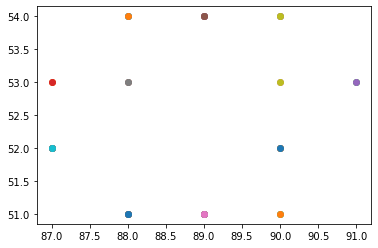

In [63]:
plt.figure()
for i in range(len(areas['12-1'].contours_small['Hb'][0])):
    plt.scatter(areas['12-1'].contours_small['Hb'][0][i][0],areas['12-1'].contours_small['Hb'][0][i][1])

# Numero de unidades por plano


In [364]:
unidades_Hb_0 = []
unidades_Hb_1 = []
unidades_Hb_2 = []

for key in areas:
    if '52' not in key:
    # print(key)
        if key[-1] == '0':
            unidades_Hb_0.append(len(areas[key].trials[0].roi_activities['Hb']))
        if key[-1] == '1':
            unidades_Hb_1.append(len(areas[key].trials[0].roi_activities['Hb']))
        if key[-1] == '2':
            unidades_Hb_2.append(len(areas[key].trials[0].roi_activities['Hb']))
    

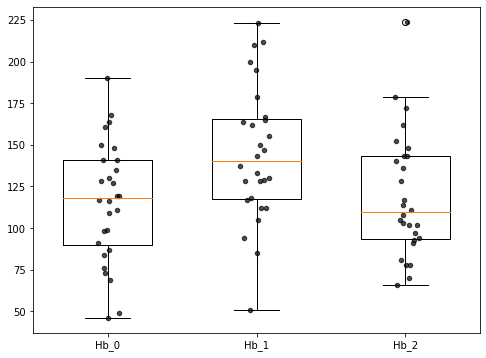

In [ ]:
# Crear figura y ejes
plt.figure(figsize=(8, 6))

# Dibujar los boxplots en distintas posiciones
positions = [1, 2, 3]
plt.boxplot([unidades_Hb_0, unidades_Hb_1, unidades_Hb_2], positions=positions, widths=0.6)

# Añadir puntos con dispersión
for i, data in enumerate([unidades_Hb_0, unidades_Hb_1, unidades_Hb_2]):
    x_jitter = np.random.normal(loc=positions[i], scale=0.05, size=len(data))  # Desplazamiento aleatorio
    plt.scatter(x_jitter, data, alpha=0.7, color='black', s=20)  # Puntos dispersos

# Etiquetas del eje x
plt.xticks(positions, ['Hb_0', 'Hb_1', 'Hb_2'])
# plt.savefig('box_plot_numero_unidades.png')
# Mostrar gráfico
plt.show()